In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import scipy.stats as stats

In [2]:
# load data
df_dataset = pd.read_excel("Dataset.xlsx")
df_key = pd.read_excel("Key.xlsx")

In [3]:
df_key

,Items,Comments
0,Residence,"1 = Tokyo, 2 = Kanagawa, 3 = Saitama, 4 = Chib..."
1,Sex,"1 = male, 2 = female"
2,Age,Age in responding the questionnaire
3,Age_Group,"1 = ≥65 yrs., 2 = 40-64 yrs., 3 = 20-39 yrs., ..."
4,Job_Group,"1 = employed, 2 = home maker, 3 = student, 4 =..."
5,Health_Worker_Self,"""Are you a healthcare worker?"" 1 = yes, 2 = no"
6,Health_Worker_Family,"""Is your family member a healthcare worker?"" 1..."
7,Married,"1 = single, 2 = married"
8,Income,"Annual household income (JPY), 1 = < 2 million..."
9,Current_Physical,"Current treatment for severe physical illness,..."


In [4]:
df_dataset

,ID,Residence,Sex,Age,Age_Group,Job_Group,Health_Worker_Self,Health_Worker_Family,Married,Income,...,Interaction_Online,Preventive_Behaviors,Optimism,Deterioration_Economy,Deterioration_Interact,Frustration,Covid_Anxiety,Covid_Sleepless,Difficulty_Living,Difficulty_Work
0,1,2,1,65,1,4,2,2,2,2.0,...,2,7,4,4,3,5,5,3,4,4
1,2,7,1,55,2,1,2,2,2,4.0,...,3,4,4,4,4,4,4,4,4,3
2,3,3,1,60,2,1,2,2,2,3.0,...,1,7,2,7,3,4,5,2,4,7
3,4,5,1,57,2,1,2,1,2,4.0,...,1,7,4,1,1,1,1,1,1,1
4,5,7,1,53,2,1,2,1,2,4.0,...,5,5,4,4,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11328,11329,7,1,37,3,5,2,2,1,NaN,...,1,7,7,7,1,4,7,4,1,1
11329,11330,3,2,41,2,1,2,2,1,NaN,...,2,5,4,4,4,5,5,4,3,6
11330,11331,3,1,52,2,1,2,2,2,NaN,...,1,7,4,7,1,5,6,5,6,7
11331,11332,1,2,27,3,1,2,2,1,NaN,...,5,5,5,4,2,3,5,4,4,4


In [5]:
# replace nan in income column with 10
df_dataset['Income'] = df_dataset['Income'].replace(np.nan,10)

In [6]:
# preprocessing
df_dataset.drop('ID',axis=1,inplace=True)
df_dataset.dropna(inplace=True)

In [7]:
print(len(df_dataset))

11333


# Hypothesis - 3

- Healthcare workers or people who have family members working in healthcare services exhibit significant difference in levels of psychological distress compared to the general population.

In [8]:
health_workers = df_dataset[df_dataset['Health_Worker_Self'] == 1]['K6']
others = df_dataset[df_dataset['Health_Worker_Self'] == 2]['K6']
print(type(health_workers))

<class 'pandas.core.series.Series'>


In [9]:
print("Number of Health Workers: ", health_workers.count())
print("Others: ", others.count())

Number of Health Workers:  661
Others:  10672


In [10]:
# Calculate the median COVID-19 anxiety score for different groups
median_k6_score = health_workers.median()
print(f"Median K6 score for healthcare population: {median_k6_score}")

median_covid19_anxiety_score = others.median()
print(f"Median K6 score for non-healthcare population: {median_covid19_anxiety_score}")


Median K6 score for healthcare population: 5.0
Median K6 score for non-healthcare population: 4.0


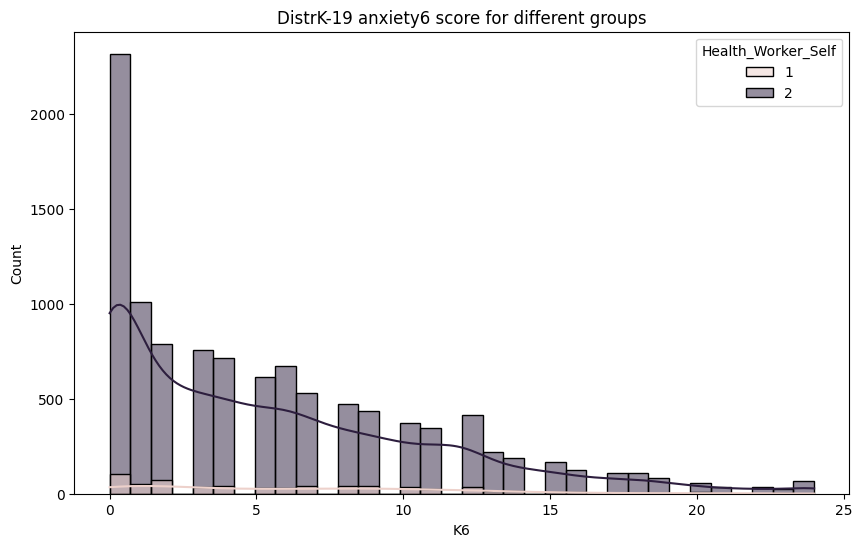

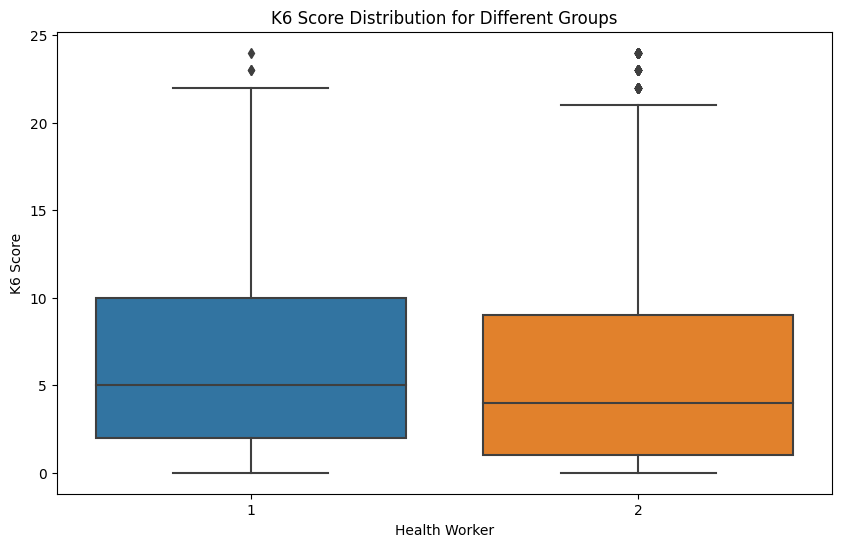

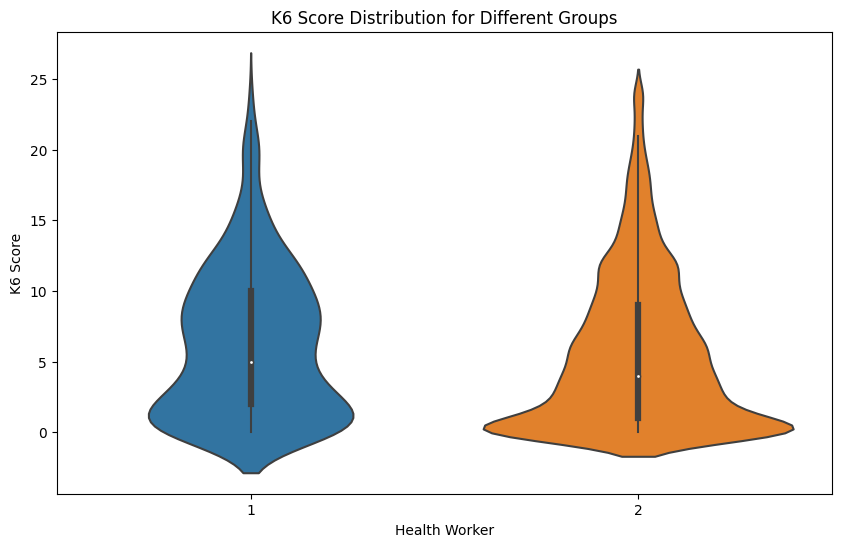

In [11]:
# plot the distribution of COVID-19 anxiety score for different groups
plt.figure(figsize=(10, 6))
sb.histplot(data=df_dataset, x='K6', hue='Health_Worker_Self', kde=True)
plt.title("DistrK-19 anxiety6 score for different groups")
plt.show()

# plot boxplot
plt.figure(figsize=(10, 6))
sb.boxplot(x='Health_Worker_Self', y='K6', data=df_dataset)
plt.title('K6 Score Distribution for Different Groups')
plt.xlabel('Health Worker')
plt.ylabel('K6 Score')
plt.show()

# plot violin plot 
plt.figure(figsize=(10, 6))
sb.violinplot(x='Health_Worker_Self', y='K6', data=df_dataset)
plt.title('K6 Score Distribution for Different Groups')
plt.xlabel('Health Worker')
plt.ylabel('K6 Score')
plt.show()

- we choose Mann-Whitney U test to test the hypothesis as the data is ordinal and non-parametric.

### Mann-Whitney U Test

In [12]:
result_mwu = stats.mannwhitneyu(health_workers,
                           others)

print("Mann-Whitney U test statistic:", result_mwu.statistic)
print("p-value:", result_mwu.pvalue)

#  Interpret the results
if result_mwu.pvalue < 0.05:
    print("There are statistically significant differences in psychological distress levels between healthcare workers or individuals with family members in healthcare services and the general population.")
else:
    print("There are no statistically significant differences in psychological distress levels between the two groups.")

Mann-Whitney U test statistic: 3858010.0
p-value: 4.5099926497445316e-05
There are statistically significant differences in psychological distress levels between healthcare workers or individuals with family members in healthcare services and the general population.


#### To do
- size difference between the two groups is large, how to handle?
- explain the violin plot
- explain why we are using Mann-Whitney U Test
- write the explanation for the results and the conclusion

#### Bootstrap Sampling

In [13]:
# health_workers = np.array(health_workers)
# others = np.array(others)

# n1 = len(health_workers)
# n2 = len(others)

# all_data = np.concatenate([health_workers, others])

# u_statistics = []

# for _ in range(1000):
#     # Resample with replacement
#     resampled_data = np.random.choice(all_data, size=(n1 + n2), replace=True)
    
#     # Calculate U statistic for the resampled data
#     resampled_group1 = resampled_data[:n1]
#     resampled_group2 = resampled_data[n1:]

#     u_statistic = stats.mannwhitneyu(health_workers, others).pvalue
#     # u_statistic = calculate_u_statistic(resampled_group1, resampled_group2)
    
#     u_statistics.append(u_statistic)    

# p_value = np.mean(u_statistics)
# print("Bootstrap sampled mean of p value: ", p_value)

# Hypothesis 1

### People of different age groups categories experienced different psychological distress levels due to the mild lockdown of COVID-19.

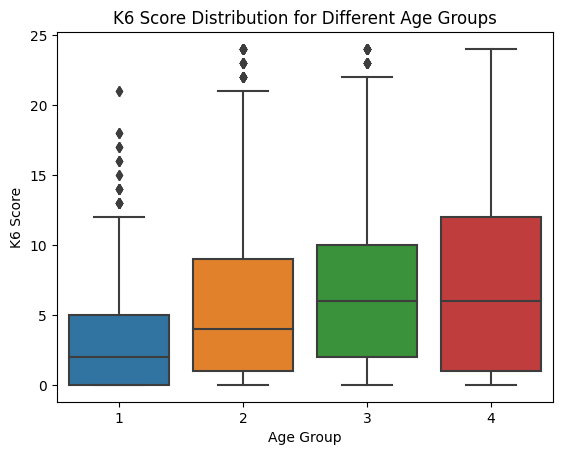

In [14]:
# categorical predictors - Sex, Married, Job_Group, Residence, Income, Age_Group
# K6, PHQ9, UCLA_LS3, LSNS6  - all ordinal variables (outcomes)

# first we test for age vs K6, we have four age groups 1, 2, 3, 4. 1 for >=65, 2 for 40-64, 3 for 20-39, 4 for 18-19
# K6 is the outcome variable
# H0: There is no difference in K6 score across different age groups
# H1: There is a difference in K6 score across different age groups

# K6 vs Age_Group
sb.boxplot(x='Age_Group', y='K6', data=df_dataset)
plt.title('K6 Score Distribution for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('K6 Score')
plt.show()



In [15]:
K6_age_group_1 = df_dataset[df_dataset['Age_Group'] == 1]['K6']
K6_age_group_2 = df_dataset[df_dataset['Age_Group'] == 2]['K6']
K6_age_group_3 = df_dataset[df_dataset['Age_Group'] == 3]['K6']
K6_age_group_4 = df_dataset[df_dataset['Age_Group'] == 4]['K6']

# mean K6 score for different age groups
print(f"Mean K6 score for age group 1: {K6_age_group_1.mean()}")
print(f"Mean K6 score for age group 2: {K6_age_group_2.mean()}")
print(f"Mean K6 score for age group 3: {K6_age_group_3.mean()}")
print(f"Mean K6 score for age group 4: {K6_age_group_4.mean()}")

# size
print(f"Size of age group 1: {K6_age_group_1.count()}") 
print(f"Size of age group 2: {K6_age_group_2.count()}")
print(f"Size of age group 3: {K6_age_group_3.count()}")
print(f"Size of age group 4: {K6_age_group_4.count()}")

# as the group 4 has very less data, we can combine group 3 and 4
K6_age_group_3_4 = df_dataset[df_dataset['Age_Group'].isin([3, 4])]['K6']

Mean K6 score for age group 1: 3.0942997888810697
Mean K6 score for age group 2: 5.459993359893758
Mean K6 score for age group 3: 6.6664886515353805
Mean K6 score for age group 4: 6.8671328671328675
Size of age group 1: 1421
Size of age group 2: 6024
Size of age group 3: 3745
Size of age group 4: 143


In [16]:
# as there are 4 groups and ordinal outcome variable, we can use Kruskal-Wallis test
result_kw = stats.kruskal(K6_age_group_1, K6_age_group_2, K6_age_group_3_4)

print("Kruskal-Wallis test statistic:", result_kw.statistic)
print("p-value:", result_kw.pvalue)

#  Interpret the results
if result_kw.pvalue < 0.05:
    print("There are statistically significant differences in K6 scores across different age groups.")
else:
    print("There are no statistically significant differences in K6 scores across different age groups.")


Kruskal-Wallis test statistic: 462.8261373691904
p-value: 3.15196386507323e-101
There are statistically significant differences in K6 scores across different age groups.


### Vrinda - dealing with multiple comparisons 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load your dataset
# Assuming your dataset is stored in a DataFrame called df_dataset

# Define your significance level
alpha = 0.05

# Define the number of comparisons being made
num_comparisons = 4  # For age groups 1, 2, 3_4, and an additional example

# Example 1: Age vs. K6 score
# Group the K6 scores by age group
K6_age_group_1 = df_dataset[df_dataset['Age_Group'] == 1]['K6']
K6_age_group_2 = df_dataset[df_dataset['Age_Group'] == 2]['K6']
K6_age_group_3_4 = df_dataset[df_dataset['Age_Group'].isin([3, 4])]['K6']

# Perform the Kruskal-Wallis test
result_kw_age = stats.kruskal(K6_age_group_1, K6_age_group_2, K6_age_group_3_4)

# Adjust the significance threshold for Bonferroni correction
alpha_adjusted = alpha / num_comparisons

# Interpret the results
if result_kw_age.pvalue < alpha_adjusted:
    print("Kruskal-Wallis test statistic:", result_kw_age.statistic)
    print("p-value:", result_kw_age.pvalue)
    print(alpha_adjusted)
    print("There are statistically significant differences in K6 scores across different age groups.")
else:
    print("There are no statistically significant differences in K6 scores across different age groups.")

# Example 2: Another comparison (replace this with your actual comparison)
# Example:
# Group the K6 scores by another category
# Perform the Kruskal-Wallis test
# result_kw_another = stats.kruskal(...)

# Adjust the significance threshold for Bonferroni correction
# alpha_adjusted = alpha / num_comparisons

# Interpret the results
# if result_kw_another.pvalue < alpha_adjusted:
#     print("There are statistically significant differences...")
# else:
#     print("There are no statistically significant differences...")

# Repeat this process for each comparison you need to make

Kruskal-Wallis test statistic: 462.8261373691904
p-value: 3.15196386507323e-101
0.0125
There are statistically significant differences in K6 scores across different age groups.


In [18]:
from scikit_posthocs import posthoc_dunn

# Perform pairwise post-hoc tests using Dunn's test
posthoc_results = posthoc_dunn(df_dataset, val_col='K6', group_col='Age_Group', p_adjust='bonferroni')

# Print the pairwise comparison results
print("Pairwise Post-hoc Test Results:")
print(posthoc_results)

# Interpret the results
significant_pairs = posthoc_results[posthoc_results < alpha_adjusted]
if significant_pairs.empty:
    print("No significant pairwise differences found after Bonferroni correction.")
else:
    print("Significant pairwise differences found after Bonferroni correction:")
    print(significant_pairs)


Pairwise Post-hoc Test Results:
               1             2              3             4
1   1.000000e+00  4.583865e-51  7.572923e-100  1.285411e-13
2   4.583865e-51  1.000000e+00   1.281872e-24  4.927254e-02
3  7.572923e-100  1.281872e-24   1.000000e+00  1.000000e+00
4   1.285411e-13  4.927254e-02   1.000000e+00  1.000000e+00
Significant pairwise differences found after Bonferroni correction:
               1             2              3             4
1            NaN  4.583865e-51  7.572923e-100  1.285411e-13
2   4.583865e-51           NaN   1.281872e-24           NaN
3  7.572923e-100  1.281872e-24            NaN           NaN
4   1.285411e-13           NaN            NaN           NaN


In [19]:
significant_pairs

,1,2,3,4
1,NaN,4.583865e-51,7.572923e-100,1.285411e-13
2,4.583865e-51,NaN,1.281872e-24,NaN
3,7.572923e-100,1.281872e-24,NaN,NaN
4,1.285411e-13,NaN,NaN,NaN


### All comparisons between different age groups have adjusted p-values below the threshold, indicating significant differences.

### for futher analysis we calculated the mean differences in K6 scores between specific pairs of age groups.

Mean Difference between Age Group 1 and Age Group 2: -2.3656935710126885
Mean Difference between Age Group 1 and Age Group 3: -3.5795685238761323
Mean Difference between Age Group 2 and Age Group 3: -1.2138749528634438


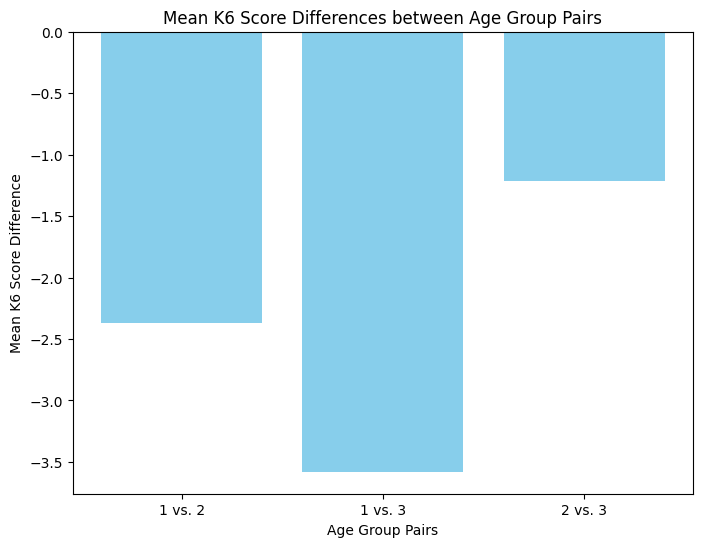

In [20]:
# Calculate mean or median differences between specific pairs of age groups
mean_diff_1_2 = K6_age_group_1.mean() - K6_age_group_2.mean()
mean_diff_1_3 = K6_age_group_1.mean() - K6_age_group_3_4.mean()
mean_diff_2_3 = K6_age_group_2.mean() - K6_age_group_3_4.mean()

# Print mean differences
print("Mean Difference between Age Group 1 and Age Group 2:", mean_diff_1_2)
print("Mean Difference between Age Group 1 and Age Group 3:", mean_diff_1_3)
print("Mean Difference between Age Group 2 and Age Group 3:", mean_diff_2_3)

# Visualize the differences using a bar plot
plt.figure(figsize=(8, 6))
mean_diffs = [mean_diff_1_2, mean_diff_1_3, mean_diff_2_3]
age_group_pairs = ['1 vs. 2', '1 vs. 3', '2 vs. 3']
plt.bar(age_group_pairs, mean_diffs, color='skyblue')
plt.xlabel('Age Group Pairs')
plt.ylabel('Mean K6 Score Difference')
plt.title('Mean K6 Score Differences between Age Group Pairs')
plt.show()


These mean differences between age groups indicate the average difference in K6 scores between the specified pairs of age groups. Here's how you can interpret each mean difference:

1. Mean Difference between Age Group 1 and Age Group 2: -2.3656935710126885
   - This means that, on average, the K6 scores of individuals in Age Group 1 are approximately 2.37 units lower than the K6 scores of individuals in Age Group 2.
   - In other words, individuals in Age Group 1 tend to report lower levels of psychological distress (as measured by the K6 scores) compared to individuals in Age Group 2.

2. Mean Difference between Age Group 1 and Age Group 3: -3.5795685238761323
   - This means that, on average, the K6 scores of individuals in Age Group 1 are approximately 3.58 units lower than the K6 scores of individuals in Age Groups 3_4 (combined).
   - Similarly to the previous comparison, individuals in Age Group 1 tend to report lower levels of psychological distress compared to individuals in Age Groups 3_4.

3. Mean Difference between Age Group 2 and Age Group 3: -1.2138749528634438
   - This means that, on average, the K6 scores of individuals in Age Group 2 are approximately 1.21 units lower than the K6 scores of individuals in Age Groups 3_4 (combined).
   - Here, individuals in Age Group 2 also tend to report lower levels of psychological distress compared to individuals in Age Groups 3_4, but the difference is smaller compared to the difference between Age Group 1 and Age Groups 3_4.

Overall, these mean differences provide insights into the differences in psychological distress levels across different age groups. They indicate that Age Group 1 tends to have lower psychological distress levels compared to both Age Group 2 and Age Groups 3_4, while Age Group 2 also tends to have lower distress levels compared to Age Groups 3_4.

### The hypothesis that people of different demographic categories experienced different psychological distress due to the mild lockdown of COVID-19 appears to be supported by the data. The Kruskal-Wallis test indicated significant differences in K6 scores across different age groups, suggesting that age influences psychological distress levels during the lockdown as was also shown by the graphs.

### Add these to the slides remove chu square test waali tables

- The Games-Howell test was conducted as a post hoc analysis, following a significant Kruskal-Wallis test, indicating that there is a statistically significant difference in K6 scores among at least two of the age groups. This test is particularly suitable because it accounts for unequal sample sizes among the groups.


In [21]:
# we do post-hoc analysis if the Kruskal-Wallis test is significant to determine which groups are different we do games-howell test as sample sizes are different
if result_kw.pvalue < 0.05:
    from pingouin import pairwise_gameshowell

    # replace age group 4 with 3
    df_dataset['Age_Group'] = df_dataset['Age_Group'].replace(4, 3)
    posthoc_games_howell = pairwise_gameshowell(data=df_dataset, dv='K6', between='Age_Group')
    print(posthoc_games_howell)

    

   A  B   mean(A)   mean(B)      diff        se          T           df  \
0  1  2  3.094300  5.459993 -2.365694  0.118943 -19.889252  3035.204083   
1  1  3  3.094300  6.673868 -3.579569  0.134037 -26.705840  3980.722111   
2  2  3  5.459993  6.673868 -1.213875  0.115402 -10.518707  7836.752602   

           pval    hedges  
0  1.790901e-12 -0.466598  
1  0.000000e+00 -0.676717  
2  1.054490e-12 -0.219943  


1. Pairwise Comparisons:
- Group 1 (>=65) vs. Group 2 (40-64):
The p-value is extremely small (4.188248e-06), indicating a statistically significant difference in K6 scores between these two groups.
The Hedges' g effect size is 0.137743, suggesting a small effect size. This means the difference in K6 scores, while statistically significant, is not very large in practical terms.
- Group 1 (>=65) vs. Group 3 (18-39):
The p-value is essentially 0 (9.214851e-14), indicating a highly significant difference in K6 scores between these groups.
The Hedges' g effect size is 0.400528, suggesting a medium to large effect size. This means the difference in K6 scores is substantial and practically meaningful.
- Group 2 (40-64) vs. Group 3 (18-39):
The p-value is 0 (0.000000e+00), indicating a highly significant difference in K6 scores.
The Hedges' g effect size is 0.259542, suggesting a small to medium effect size. The difference in K6 scores is statistically significant and practically relevant.
2. Conclusion:
- We reject the null hypothesis of no difference in K6 scores across the three age groups.
- All pairwise comparisons are statistically significant, indicating that each age group has significantly different K6 scores compared to the other two groups.
- The effect sizes suggest that the differences between Group 1 (>=65) and Group 3 (18-39) are the most substantial, followed by the differences between Group 2 (40-64) and Group 3 (18-39).

In [22]:
# Optimism
# Deterioration_Economy
# Deterioration_Interact
# Frustration
# Covid_Anxiety
# Covid_Sleepless
# Difficulty_Living
# Difficulty_Work

# 4th hypothesis ke liye

### People of different Residence categories managed their lifestyle differently during the COVID-19 pandemic.

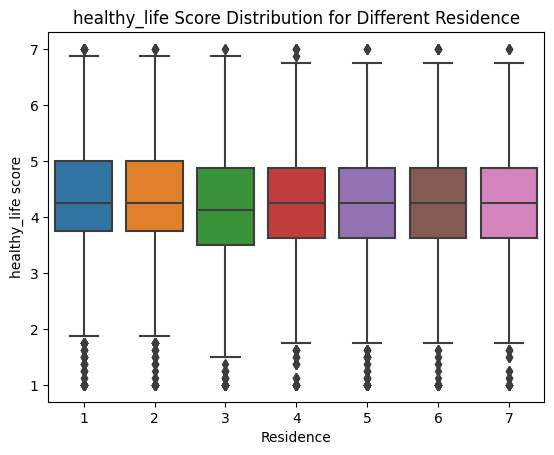

In [23]:
# H0: There is no difference in K6 score across different regions of japan
# H1: There is a difference in K6 score across different regions of japan
# 1 = Tokyo, 2 = Kanagawa, 3 = Saitama, 4 = Chiba, 5 = Osaka, 6 = Hyogo, 7 = Fukuoka
healthy_life = ["Exercise", "Healthy_Diet", "Healthy_Sleep", "Activity", "Interaction_Offline", "Interaction_Online", "Preventive_Behaviors", "Optimism"]
# healthy_life = ["Exercise", "Healthy_Diet", "Interaction_Offline", "Interaction_Online"]

df_dataset["healthy_life"] = df_dataset[healthy_life].mean(axis=1)
independent_var = "Residence"
dependent_var = "healthy_life" 
# K6 vs Residence
sb.boxplot(x=independent_var, y=dependent_var, data=df_dataset)
plt.title(f'{dependent_var} Score Distribution for Different {independent_var}')
plt.xlabel(independent_var)
plt.ylabel(f'{dependent_var} score')
plt.show()


In [24]:
k6_region_1 = df_dataset[df_dataset[independent_var] == 1][dependent_var] # Tokyo
k6_region_2 = df_dataset[df_dataset[independent_var] == 2][dependent_var] # Kanagawa
k6_region_3 = df_dataset[df_dataset[independent_var] == 3][dependent_var] # Saitama
k6_region_4 = df_dataset[df_dataset[independent_var] == 4][dependent_var] # Chiba
k6_region_5 = df_dataset[df_dataset[independent_var] == 5][dependent_var] # Osaka
k6_region_6 = df_dataset[df_dataset[independent_var] == 6][dependent_var] # Hyogo
k6_region_7 = df_dataset[df_dataset[independent_var] == 7][dependent_var] # Fukuoka

# print mean K6 score for different regions
print(f"Mean K6 score for Tokyo: {k6_region_1.mean()}")
print(f"Mean K6 score for Kanagawa: {k6_region_2.mean()}")
print(f"Mean K6 score for Saitama: {k6_region_3.mean()}")
print(f"Mean K6 score for Chiba: {k6_region_4.mean()}")
print(f"Mean K6 score for Osaka: {k6_region_5.mean()}")
print(f"Mean K6 score for Hyogo: {k6_region_6.mean()}")
print(f"Mean K6 score for Fukuoka: {k6_region_7.mean()}")
# size
print(f"Size of Tokyo: {k6_region_1.count()}")
print(f"Size of Kanagawa: {k6_region_2.count()}")
print(f"Size of Saitama: {k6_region_3.count()}")
print(f"Size of Chiba: {k6_region_4.count()}")
print(f"Size of Osaka: {k6_region_5.count()}")
print(f"Size of Hyogo: {k6_region_6.count()}")
print(f"Size of Fukuoka: {k6_region_7.count()}")

# k6_sex_1 = df_dataset[df_dataset['Sex'] == 1][var]
# k6_sex_2 = df_dataset[df_dataset['Sex'] == 2][var]

# # mean K6 score for different age groups
# print(f"Mean K6 score for Males:", k6_sex_1.mean())
# print(f"Mean K6 score for Females:", k6_sex_2.mean())

# # size
# print(f"Size of Males:", k6_sex_1.count())
# print(f"Size of Females:", k6_sex_2.count())

# divide the K6 score into 3 grpups, <=4, 5-12, >=13 and do chi-square test
# # H0: There is no association between K6 score and region of japan
# # H1: There is an association between K6 score and region of japan
# df_dataset['K6_Group'] = pd.cut(df_dataset[var], bins=[0, 4, 12, 24], labels=['Low', 'Medium', 'High'])

# # contingency table
# contingency_table = pd.crosstab(df_dataset['Residence'], df_dataset['K6_Group'])
# print(contingency_table)

# # chi-square test
# chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# print("Chi-square test statistic:", chi2)
# print("p-value:", p)

# # do for males and females
# df_dataset['K6_Group'] = pd.cut(df_dataset[var], bins=[0, 4, 12, 24], labels=['Low', 'Medium', 'High'])

# contingency_table = pd.crosstab(df_dataset['Sex'], df_dataset['K6_Group'])
# print(contingency_table)

# # chi-square test
# chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
# print("Chi-square test statistic:", chi2)
# print("p-value:", p)

# # post-hoc analysis
# if p < 0.05:
#     from statsmodels.stats.multicomp import pairwise_tukeyhsd

#     posthoc_tukey = pairwise_tukeyhsd(df_dataset['K6_Group'], df_dataset['Sex'])
#     print(posthoc_tukey)



Mean K6 score for Tokyo: 4.268460294646065
Mean K6 score for Kanagawa: 4.2457058507783145
Mean K6 score for Saitama: 4.117334905660377
Mean K6 score for Chiba: 4.199524940617577
Mean K6 score for Osaka: 4.134057971014493
Mean K6 score for Hyogo: 4.182975871313673
Mean K6 score for Fukuoka: 4.167721518987341
Size of Tokyo: 2783
Size of Kanagawa: 1863
Size of Saitama: 1484
Size of Chiba: 1263
Size of Osaka: 1794
Size of Hyogo: 1119
Size of Fukuoka: 1027


In [25]:
# as there are 7 groups and ordinal outcome variable, we can use Kruskal-Wallis test
# result_kw = stats.kruskal(k6_region_2, k6_region_3, k6_region_5)
result_kw = stats.kruskal(k6_region_1, k6_region_2, k6_region_3, k6_region_4, k6_region_5, k6_region_6, k6_region_7)

print("Kruskal-Wallis test statistic:", result_kw.statistic)
print("p-value:", result_kw.pvalue)

#  Interpret the results
if result_kw.pvalue < 0.05:
    print("There are statistically significant differences in K6 scores across different regions of Japan.")
else:
    print("There are no statistically significant differences in K6 scores across different regions of Japan.")

# # as we have only two groups, and ordinal outcome variable, we can use Mann-Whitney U test
# result_mwu = stats.mannwhitneyu(k6_sex_1, k6_sex_2)
# print("Mann-Whitney U test statistic:", result_mwu.statistic)
# print("p-value:", result_mwu.pvalue)

# #  Interpret the results
# if result_mwu.pvalue < 0.05:
#     print(f"There are statistically significant differences in {var} scores between Males and Females.")
# else:
#     print(f"There are no statistically significant differences in {var} scores between Males and Females.")

Kruskal-Wallis test statistic: 27.77618272763172
p-value: 0.00010353365092981721
There are statistically significant differences in K6 scores across different regions of Japan.


In [26]:
# post-hoc analysis
if result_kw.pvalue < 0.05:
    # from pingouin import pairwise_gameshowell
    # new_df = df_dataset[df_dataset['Residence'].isin([2, 3, 5])]
    # posthoc_games_howell = pairwise_gameshowell(data=new_df, dv=var, between='Residence')
    # print(posthoc_games_howell)
    # tukey test
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    from statsmodels.stats.multicomp import MultiComparison

    # new_df = df_dataset[df_dataset[independent_var].isin([2, 3, 5])]
    mc = MultiComparison(df_dataset[dependent_var], df_dataset[independent_var])
    result = mc.tukeyhsd()
    print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0228 0.9922 -0.1176  0.0721  False
     1      3  -0.1511 0.0002  -0.253 -0.0493   True
     1      4  -0.0689 0.4865 -0.1765  0.0386  False
     1      5  -0.1344 0.0007 -0.2304 -0.0385   True
     1      6  -0.0855 0.2704 -0.1977  0.0267  False
     1      7  -0.1007 0.1361 -0.2164   0.015  False
     2      3  -0.1284 0.0107 -0.2386 -0.0181   True
     2      4  -0.0462 0.9022 -0.1617  0.0693  False
     2      5  -0.1116 0.0281 -0.2165 -0.0068   True
     2      6  -0.0627 0.7184 -0.1826  0.0571  False
     2      7   -0.078 0.5024 -0.2011  0.0452  False
     3      4   0.0822 0.4161 -0.0391  0.2035  False
     3      5   0.0167 0.9994 -0.0945  0.1279  False
     3      6   0.0656 0.7188 -0.0598  0.1911  False
     3      7   0.0504 0.9107 -0.0782   0.179  False
     4      5  -0.0655 0.6439 -0.1819  0.0509 

### People of different Job profile categories experienced different psychological impacts due to the mild lockdown of COVID-19.

In [27]:
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
stressors = ["Deterioration_Economy", "Deterioration_Interact", "Frustration", "Covid_Anxiety", "Covid_Sleepless", "Difficulty_Living", "Difficulty_Work"]
df_dataset["stressors"] = df_dataset[stressors].mean(axis=1)
independent_var = "Job_Group"
dependent_var = "stressors"

# Perform MANOVA
formula = ' + '.join(stressors
) + ' ~ ' + independent_var
manova = MANOVA.from_formula(formula, data=df_dataset)

# Print MANOVA results
print(manova.mv_test())

# 1 = employed, 2 = home maker, 3 = student, 4 = unemployed, 5 = others
k6_emp = df_dataset[df_dataset['Job_Group'] == 1][dependent_var]
k6_home = df_dataset[df_dataset['Job_Group'] == 2][dependent_var]
k6_stud = df_dataset[df_dataset['Job_Group'] == 3][dependent_var]
k6_unemp = df_dataset[df_dataset['Job_Group'] == 4][dependent_var]
k6_other = df_dataset[df_dataset['Job_Group'] == 5][dependent_var]

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF    F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.2461 7.0000 11325.0000 4954.8047 0.0000
         Pillai's trace 0.7539 7.0000 11325.0000 4954.8047 0.0000
 Hotelling-Lawley trace 3.0626 7.0000 11325.0000 4954.8047 0.0000
    Roy's greatest root 3.0626 7.0000 11325.0000 4954.8047 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
         Job_Group        Value  Num DF   Den DF   F Value Pr > F
-----------------------------------------------------------------
            Wilks' lambda 0.9779 7.0000 11325.0000 36.5925 0.0000
           Pillai's trace 0.02

In [28]:
# kruskal wallis test
result_kw = stats.kruskal(k6_emp, k6_home, k6_stud, k6_unemp, k6_other)

print("Kruskal-Wallis test statistic:", result_kw.statistic)
print("p-value:", result_kw.pvalue)

# Interpret the results
if result_kw.pvalue < 0.05:
    print(f"There are statistically significant differences in {dependent_var} scores across different job groups.")
else:
    print(f"There are no statistically significant differences in {dependent_var} scores across different job groups.")


Kruskal-Wallis test statistic: 204.6893506710753
p-value: 3.6860426401087465e-43
There are statistically significant differences in stressors scores across different job groups.


- we use games-howell test as post hoc analysis to test the hypothesis as the groups have unequal sample sizes.

In [29]:
# the effect of gender and employment on covid anxiety, we can use two-way ANOVA
# H0: There is no interaction effect
# H1: There is an interaction effect
from statsmodels.stats.anova import anova_lm

from statsmodels.formula.api import ols

model = ols('Covid_Anxiety ~ C(Sex) + C(Job_Group) + C(Sex):C(Job_Group)', data=df_dataset)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          Covid_Anxiety   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     73.57
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          8.53e-133
Time:                        20:13:43   Log-Likelihood:                -21752.
No. Observations:               11333   AIC:                         4.352e+04
Df Residuals:                   11323   BIC:                         4.360e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Chi-sq: Socio-demographic characteristics by psychological distress severity

In [30]:
independent_vars = ["Age_Group", "Residence", "Sex", "Job_Group", "Health_Worker_Self", "Health_Worker_Family", "Married", "Income", "Current_Physical", "Past_Physical", "Current_Mental", "Past_Mental"]
dependent_vars = "K6"


In [31]:
for independent_var in independent_vars:
    # check for normality, kolmogorov-smirnov test for all unique values of independent variable
    for value in df_dataset[independent_var].unique():
        data = df_dataset[df_dataset[independent_var] == value][dependent_vars]
        k2, p = stats.kstest(data, 'norm')
        print(f"Kolmogorov-Smirnov test statistic for {independent_var}={value}:", k2)
        print(f"p-value for {independent_var}={value}:", p)
        if p < 0.05:
            print(f"Data for {independent_var}={value} is not normally distributed.")
        else:
            print(f"Data for {independent_var}={value} is normally distributed.")
        print()

    # # make contentingency table for K6 divided into 3 groups <=4, 5-12, >=13
    df_dataset['K6_Group'] = pd.cut(df_dataset[dependent_vars], bins=[-1, 4, 12, 25], labels=['Low', 'Medium', 'High'])
    

    # contingency table
    contingency_table = pd.crosstab(df_dataset[independent_var], df_dataset['K6_Group'])
    print(contingency_table)
    # chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print("Chi-square test statistic:", chi2)
    print("p-value:", p)
    print("==============================")
    

Kolmogorov-Smirnov test statistic for Age_Group=1: 0.5148141338236449
p-value for Age_Group=1: 0.0
Data for Age_Group=1 is not normally distributed.

Kolmogorov-Smirnov test statistic for Age_Group=2: 0.6659948879721396
p-value for Age_Group=2: 0.0
Data for Age_Group=2 is not normally distributed.

Kolmogorov-Smirnov test statistic for Age_Group=3: 0.7390811437719854
p-value for Age_Group=3: 0.0
Data for Age_Group=3 is not normally distributed.

K6_Group    Low  Medium  High
Age_Group                    
1          1032     358    31
2          3157    2230   637
3          1695    1558   635
Chi-square test statistic: 423.9086823650897
p-value: 1.8953337966364994e-90
Kolmogorov-Smirnov test statistic for Residence=2: 0.6417694601076447
p-value for Residence=2: 0.0
Data for Residence=2 is not normally distributed.

Kolmogorov-Smirnov test statistic for Residence=7: 0.6607941718492891
p-value for Residence=7: 0.0
Data for Residence=7 is not normally distributed.

Kolmogorov-Smirnov test

- No data is normally distributed, so we use non-parametric tests i.e chi-square test by dividing the "K6" scores into 3 categories: low (0-4), moderate (5-12), and severe (13-24).

1 = employed, 2 = home maker, 3 = student, 4 = unemployed, 5 = others
| Characteristic, n (%) | Low | Medium | High | Total | χ² | df | p |
|------------------------|-----|--------|------|-------|----|----|---|
| **Age Group**          |     |        |      |       | 428.66 | 6 | <0.001 |
| >=65                      | 1032 (72.6) | 358 (25.2) | 31 (2.2)  | 1421  
| 40 - 64                      | 3157 (52.4)| 2230 (37.0)| 637 (10.6) | 6024  |     |    |     |
| 20 - 39                    | 1633 (43.6)| **1508 (40.3**)| **604 (16.1)** | 3745  |     |    |     |
| 18 - 19                 | 62 (43.4)  | 50 (35.0)  | **31 (21.7)**  | 143   |     |    |     |
| **Residence**          |     |        |      |       | 13.25 | 6  | 0.35|
| Tokyo                      | 1468 (52.8)| 991 (35.6) | 324 (11.7) | 2783  
| Kanagawa                      | 993 (53.3) | 668 (35.9) | 202 (10.8) | 1863  |     |    |    |
| Saitama                      | 754 (50.8) | 539 (36.3) | 191 (12.9) | 1484  |     |    |    |
| Chiba                      | 628 (49.6) | 490 (38.8) | 145 (11.5) | 1263  |     |    |    |
| Osaka                      | 902 (50.3) | 692 (38.6) | 200 (11.1) | 1794  |     |    |    |
| Hyogo                      | 590 (52.8) | 407 (36.4) | 122 (10.9) | 1119  |     |    |    |
| Fukuoka                      | 549 (53.4) | 359 (34.9) | 119 (11.6) | 1027  |     |    |    |
| **Sex**                |     |        |      |       | 134.68 | 2 | <0.001|
| Male                   | 3098 (57.5)| 1789 (33.2)| 504 (9.4)  | 5391  
| Female                 | 2786 (46.9)| **2357 (39.7)**| **799 (13.5)** | 5942  |     |    |     |
| **Job Group**          |     |        |      |       | 75.60 | 8 | <0.001|
| employed                      | 3948 (51.4)| 2852 (37.2)| 885 (11.5) | 7685  
| home maker                      | 919 (50.9) | **699 (38.7)** | 188 (10.4) | 1806  |     |    |    |
| student                      | 175 (43.0) | 158 (38.9) | **74 (18.2)**  | 407   |     |    |    |
| unemployed                      | 662 (61.9) | 304 (28.5) | 102 (9.5)  | 1068  |     |    |    |
| others                      | 180 (49.0) | 133 (36.2) | 54 (14.7)  | 367   |     |    |    |
| **Healthcare worker (self)** |     |        |      |       | 15.46 | 2  | 0.00044|
| Yes                     | 299 (45.2) |**288 (43.6)** | 74 (11.2)   | 661   
| No                    | 5585 (52.3)| 3858 (36.2)| 1229 (11.5)| 10672 |     |    |    |
| **Healthcare worker (family)** |     |        |      |       | 2.49 | 2  | 0.29|
| Yes                     | 493 (49.7) | 373 (37.6) | 125 (12.6)  | 991   
| No                    | 5391 (52.1)| 3773 (36.5)| 1178 (11.4)| 10342 |     |    |    |
| **Marital status**     |     |        |      |       | 191.36 | 2 | <0.001|
| Unmarried              | 1951 (45.4)| **1646 (38.3)**| **693 (16.1)** | 4290  
| Married                | 3933 (56.0)| 2500 (35.5)| 610 (8.7)  | 7043  |     |    |     |
| **Annual household income (JPY)** | | |  |    |   |  |     |
| < 2 million                       | 273 (43.1%)   | 233 (36.8%)               | **127 (20.1%)** | 633   |     |    |      |
| 2-4 million                       | 1020 (51.3%)  | 739 (37.1%)               | 231 (11.6%) | 1990  |     |    |      |
| 4-6 million                       | 1174 (53.0%)  | 797 (36.1%)               | 243 (11.0%) | 2214  |     |    |      |
| 6-8 million                       | 817 (54.6%)   | 529 (35.4%)               | 149 (10.0%) | 1495  |     |    |      |
| 8-10 million                      | 559 (57.6%)   | 336 (34.6%)               | 75 (7.7%)   | 970   |     |    |      |
| 10-12 million                     | 311 (58.1%)   | 182 (34.0%)               | 42 (7.9%)   | 535   |     |    |      |
| 12-15 million                     | 219 (63.0%)   | 100 (28.7%)               | 29 (8.3%)   | 348   |     |    |      |
| 15-20 million                     | 119 (66.1%)   | 46 (25.6%)                | 15 (8.3%)   | 180   |     |    |      |
| ≥ 20 million                      | 59 (60.8%)    | 30 (30.9%)                | 8 (8.2%)    | 97    |     |    |      |
| Unknown                           | 1333 (46.4%)  | 1154 (40.2%)              | 384 (13.4%) | 2871  |     |    |      |
| **Current treatment for severe physical illness** |     |        |      |       | 2.54 | 2  | 0.28|
| Yes                     | 248 (51.5) | 168 (34.9) | 66 (13.7)  | 482   
| No                    | 5636 (52.0)| 3978 (36.7)| 1237 (11.4)| 10851 |     |    |    |
| **Past treatment for severe physical illness** |     |        |      |       | 1.12 | 2  | 0.57||
| Yes                     | 440 (51.6) | 304 (35.7) | 107 (12.6) | 851   
| No                    | 5444 (54.8)| 3842 (38.6)| 1196 (12.0)| 10482 |     |    |    |
| **Current treatment for mental problem** |     |        |      |       | 663.31| 2  | <0.001|
| Yes                     | 110 (17.2) | **271 (42.3)** | **260 (40.6)** | 641   
| No                    | 5774 (54.0)| 3875 (36.2)| 1043 (9.8) | 10692 |     |    |    |
| **Past treatment for mental problem** |     |        |      |       | 563.09| 2  | <0.001|
| Yes                     | 383 (28.0) | **600 (43.9)** | **383 (28.0)** | 1366  
| No                    | 5501 (55.2)| 3546 (35.6)| 920 (9.2)  | 9967  |     |    |    |

#### Conclusions
- Using Chi-square tests, we found that several socio-demographic characteristics were significantly associated with the `K6` scores except for `residence`, `Current treatment for severe physical illness`, `Past treatment for severe physical illness`, and `Healthcare worker (family)`.
- The socio-demographic characteristics by severity of psychological distress, as measured by the K6, are shown above. In total, 4,146 participants (36.6%) had MMPD (K6 score 5-12) and 1,303 participants (11.5%) had SPD (K6 score ≥ 13). The estimated prevalence of depression (PHQ-9 score ≥ 10) was 2,034 (17.9%).

- In the MMPD group, significantly more participants were aged 20-39 years, women, employed, homemakers, healthcare worker, single, currently being treated for psychological problems, and had received treatment for psychological problems in the past as compared to their counterparts.

- In the SPD group, the following characteristics were observed to be significantly more prevalent: aged 18-19 years or 20-39 years, women, students, unmarried, income of less than 2 million yen, currently being treated for psychological problems, and having been treated for psychological problems in the past (all ps < 0.001).

## Futher we analyze some combinations of the socio-demographic characteristics and K6 scores which were significant in the chi-square test.

#### Income and K6 scores

In [32]:
income_k6 = df_dataset.groupby('Income')['K6']

# array of income groups
income_groups = df_dataset['Income'].unique()
# print(income_groups)

# make 10 arrays one for each income group having K6 scores
income_k6 = [df_dataset[df_dataset['Income'] == income_group]['K6'] for income_group in income_groups]

# print(income_k6)

# Kruskal-Wallis test
result_kw = stats.kruskal(*income_k6)

print("Kruskal-Wallis test statistic:", result_kw.statistic)
print("p-value:", result_kw.pvalue)

#  Interpret the results
if result_kw.pvalue < 0.05:
    print("There are statistically significant differences in K6 scores across different income groups.")
else:
    print("There are no statistically significant differences in K6 scores across different income groups.")

# post-hoc analysis
if result_kw.pvalue < 0.05:
    # games-howell test
    from pingouin import pairwise_gameshowell

    posthoc_games_howell = pairwise_gameshowell(data=df_dataset, dv='K6', between='Income')
    print(posthoc_games_howell)

Kruskal-Wallis test statistic: 173.82798532092642
p-value: 9.829692426035736e-33
There are statistically significant differences in K6 scores across different income groups.
      A     B   mean(A)   mean(B)      diff        se         T           df  \
0   1.0   2.0  7.229068  5.653769  1.575299  0.284580  5.535519   930.437967   
1   1.0   3.0  7.229068  5.412827  1.816240  0.280819  6.467649   886.926211   
2   1.0   4.0  7.229068  5.157860  2.071208  0.289792  7.147221   986.301329   
3   1.0   5.0  7.229068  4.822680  2.406388  0.302280  7.960783  1099.695550   
4   1.0   6.0  7.229068  4.684112  2.544956  0.334634  7.605198  1154.658172   
5   1.0   7.0  7.229068  4.324713  2.904355  0.375729  7.729921   861.745568   
6   1.0   8.0  7.229068  3.922222  3.306846  0.438831  7.535581   385.803567   
7   1.0   9.0  7.229068  4.494845  2.734223  0.567495  4.818055   150.602992   
8   1.0  10.0  7.229068  6.228840  1.000228  0.277797  3.600570   853.053708   
9   2.0   3.0  5.653769  5

- Above tests reveals significant differences in K6 scores across income groups (p < 0.001), indicating a correlation between income and mental well-being. Notably, individuals with lower incomes (< 2 million) exhibit higher K6 scores, suggesting poorer mental health. Conversely, those with higher incomes (≥ 20 million) tend to have lower K6 scores, indicating better mental well-being. The unknown income group also shows lower mental well-being compared to known income groups.

## If you want to keep thse tables tell what is the conclusion

#### Health care self and K6 scores

In [33]:
var = "K6"
health_workers = df_dataset[df_dataset['Health_Worker_Self'] == 1][var]
others = df_dataset[df_dataset['Health_Worker_Self'] == 2][var]

# check for normality
k2, p = stats.kstest(health_workers, 'norm')
if p < 0.05:
    print("Data for health workers is not normally distributed.")
else:
    print("Data for health workers is normally distributed.")

# Mann-Whitney U test
result_mwu = stats.mannwhitneyu(health_workers, others)

print("Mann-Whitney U test statistic:", result_mwu.statistic)
print("p-value:", result_mwu.pvalue)

# calculate cohens d
# Calculate Cohen's d
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.var(x, ddof=1) + (ny-1)*np.var(y, ddof=1)) / dof)

cohens_d = cohen_d(health_workers, others)
print("Cohen's d:", cohens_d)

Data for health workers is not normally distributed.
Mann-Whitney U test statistic: 3858010.0
p-value: 4.5099926497445316e-05
Cohen's d: 0.12153917310160131


- While the difference is statistically significant (given the p-value of < 0.001), the practical significance may be limited due to the small effect size Cohen's d of 0.12. This suggests that healthcare workers (self) may experience slightly different levels of psychological distress compared to non-healthcare workers, but the effect is not substantial.

#### Job vs Activity

In [34]:
job_groups = df_dataset['Job_Group'].unique()

# make 5 arrays one for each job group having Activity scores
job_k6 = [df_dataset[df_dataset['Job_Group'] == job_group]['Activity'] for job_group in job_groups]

# # check for normality
# for job_group in job_groups:
#     data = df_dataset[df_dataset['Job_Group'] == job_group]['Activity']
#     k2, p = stats.kstest(data, 'norm')
#     print(f"Kolmogorov-Smirnov test statistic for Job Group={job_group}:", k2)
#     print(f"p-value for Job Group={job_group}:", p)
#     if p < 0.05:
#         print(f"Data for Job Group={job_group} is not normally distributed.")
#     else:
#         print(f"Data for Job Group={job_group} is normally distributed.")
#     print()

# Kruskal-Wallis test
result_kw = stats.kruskal(*job_k6)

print("Kruskal-Wallis test statistic:", result_kw.statistic)
print("p-value:", result_kw.pvalue)

#  Interpret the results
if result_kw.pvalue < 0.05:
    print("There are statistically significant differences in Activity scores across different job groups.")
else:
    print("There are no statistically significant differences in Activity scores across different job groups.")

# post-hoc analysis
if result_kw.pvalue < 0.05:
    # games-howell test
    from pingouin import pairwise_gameshowell

    posthoc_games_howell = pairwise_gameshowell(data=df_dataset, dv='Activity', between='Job_Group')
    print(posthoc_games_howell)



Kruskal-Wallis test statistic: 104.36456094719156
p-value: 1.1568858075711343e-21
There are statistically significant differences in Activity scores across different job groups.
   A  B   mean(A)   mean(B)      diff        se         T           df  \
0  1  2  3.980221  3.933555  0.046666  0.044005  1.060474  2683.666644   
1  1  3  3.980221  4.737101 -0.756880  0.081960 -9.234758   452.899145   
2  1  4  3.980221  4.193820 -0.213599  0.055599 -3.841774  1361.415173   
3  1  5  3.980221  4.119891 -0.139670  0.090527 -1.542850   400.145236   
4  2  3  3.933555  4.737101 -0.803546  0.089097 -9.018820   623.929130   
5  2  4  3.933555  4.193820 -0.260265  0.065666 -3.963469  2218.009384   
6  2  5  3.933555  4.119891 -0.186336  0.097036 -1.920284   523.980233   
7  3  4  4.737101  4.193820  0.543281  0.095357  5.697320   775.496969   
8  3  5  4.737101  4.119891  0.617210  0.119151  5.180074   753.633192   
9  4  5  4.193820  4.119891  0.073929  0.102814  0.719057   639.150730   

       

- Below table has some interesting insights all having p-value < 0.001

| Job Groups              | Mean Difference | Effect Size (Hedges' g) | Insight                                                                                          |
|-------------------------|-----------------|--------------------------|--------------------------------------------------------------------------------------------------|
| Employed vs. Student    | -0.76           | -0.46                    | Students report higher activity levels compared to employed individuals.                       |
| Employed vs. Unemployed | -0.21           | -0.13                    | Despite statistically significant differences, the mean difference in activity levels between employed and unemployed individuals is relatively small. |
| Home Maker vs. Student  | -0.46           | -0.30                    | Home makers report lower activity levels compared to students.                                   |
| Student vs. Others      | 0.62            | 0.38                     | Students engage in significantly more activities compared to others.                             |


#### Married vs Preventive_Behaviors 

In [35]:
married = df_dataset[df_dataset['Married'] == 2]['Preventive_Behaviors']
not_married = df_dataset[df_dataset['Married'] == 1]['Preventive_Behaviors']

# check for normality
k2, p = stats.kstest(married, 'norm')
if p < 0.05:
    print("Data for married group is not normally distributed.")
else:
    print("Data for married group is normally distributed.")

k2, p = stats.kstest(not_married, 'norm')
if p < 0.05:
    print("Data for not married group is not normally distributed.")
else:
    print("Data for not married group is normally distributed.")


# Mann-Whitney U test
result_mwu = stats.mannwhitneyu(married, not_married)

print("Mann-Whitney U test statistic:", result_mwu.statistic)
print("p-value:", result_mwu.pvalue)

# Calculate Cohen's d
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.var(x, ddof=1) + (ny-1)*np.var(y, ddof=1)) / dof)

# Calculate Cohen's d
cohen_d_value = cohen_d(married, not_married)
print("Cohen's d:", cohen_d_value)


Data for married group is not normally distributed.
Data for not married group is not normally distributed.
Mann-Whitney U test statistic: 15593443.5
p-value: 0.0026305776177527867
Cohen's d: 0.09424290250294627


### Vrinda- multiple comaprisons 

In [36]:
from scipy import stats
import numpy as np

# Separate data for married and not married groups
married = df_dataset[df_dataset['Married'] == 2]['Preventive_Behaviors']
not_married = df_dataset[df_dataset['Married'] == 1]['Preventive_Behaviors']

# Check for normality
k2, p_married = stats.kstest(married, 'norm')
k2, p_not_married = stats.kstest(not_married, 'norm')

# Set the significance level after Bonferroni correction
alpha = 0.05 / 2  # Dividing by 2 for the two comparisons (married vs not married)

# Check if the data is normally distributed
if p_married < alpha:
    print("Data for married group is not normally distributed.")
else:
    print("Data for married group is normally distributed.")

if p_not_married < alpha:
    print("Data for not married group is not normally distributed.")
else:
    print("Data for not married group is normally distributed.")

# Mann-Whitney U test
result_mwu = stats.mannwhitneyu(married, not_married)

print("Mann-Whitney U test statistic:", result_mwu.statistic)
print("p-value:", result_mwu.pvalue)

# Calculate Cohen's d
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.var(x, ddof=1) + (ny-1)*np.var(y, ddof=1)) / dof)

# Calculate Cohen's d
cohen_d_value = cohen_d(married, not_married)
print("Cohen's d:", cohen_d_value)


Data for married group is not normally distributed.
Data for not married group is not normally distributed.
Mann-Whitney U test statistic: 15593443.5
p-value: 0.0026305776177527867
Cohen's d: 0.09424290250294627


I divided the alpha level by 2 because there are two comparisons (married vs not married).
The significance level after Bonferroni correction (alpha) is then used to determine if the data is normally distributed and to evaluate the Mann-Whitney U test.

## Conclusion-it can be concluded that while there is a difference in preventive behaviors between married and unmarried individuals, this difference is small in practical terms. 

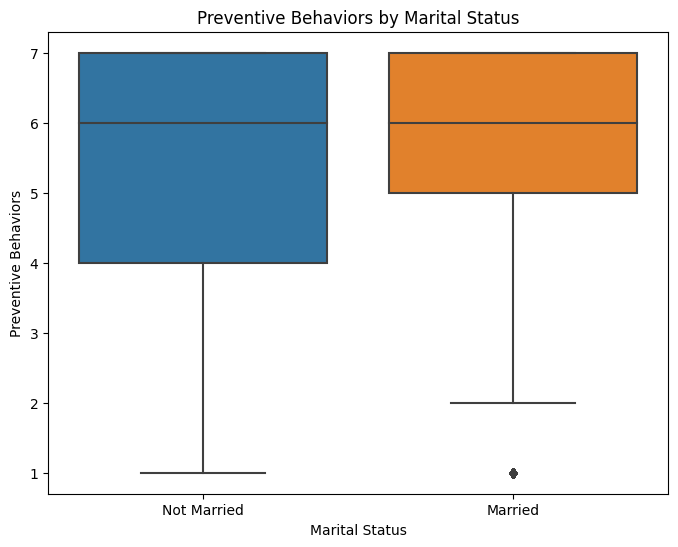

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Married', y='Preventive_Behaviors', data=df_dataset)
plt.title('Preventive Behaviors by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Preventive Behaviors')
plt.xticks(ticks=[0, 1], labels=['Not Married', 'Married'])
plt.show()


- While the difference is statistically significant (given the p-value of 0.002), the practical significance may be limited due to the small effect size Cohen's d of 0.1. This suggests that the difference in preventive behaviors between married and unmarried individuals is relatively small.

#### current_mental, past mental vs Frustration

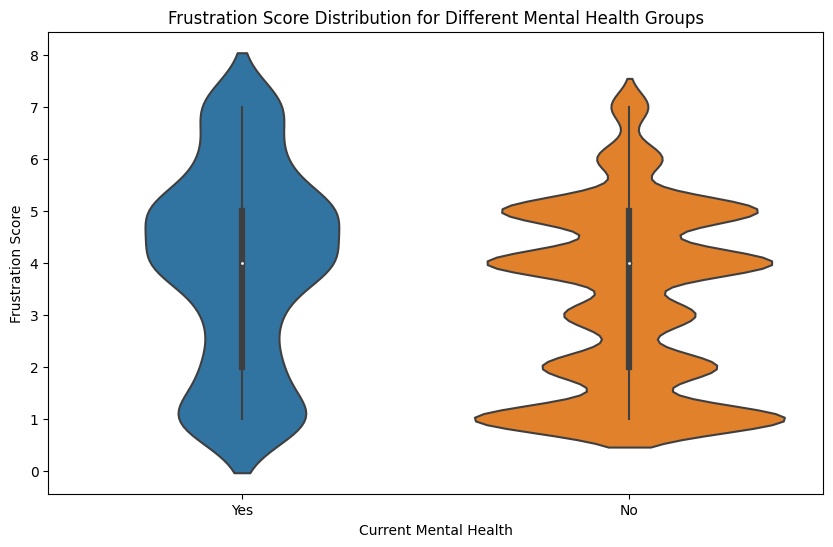

Data for current mental health group is not normally distributed.
Data for past mental health group is not normally distributed.
Mann-Whitney U test statistic: 4114559.0
p-value: 2.8588994921115682e-18
Cohen's d: 0.3825002533094236


In [38]:
current_mental = df_dataset[df_dataset['Current_Mental'] == 1]['Frustration']
past_mental = df_dataset[df_dataset['Current_Mental'] == 2]['Frustration']

# plot violin plot
plt.figure(figsize=(10, 6))
sb.violinplot(x='Current_Mental', y='Frustration', data=df_dataset)
plt.title('Frustration Score Distribution for Different Mental Health Groups')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])
plt.xlabel('Current Mental Health')
plt.ylabel('Frustration Score')
plt.show()

# check for normality
k2, p = stats.kstest(current_mental, 'norm')
if p < 0.05:
    print("Data for current mental health group is not normally distributed.")
else:
    print("Data for current mental health group is normally distributed.")

k2, p = stats.kstest(past_mental, 'norm')
if p < 0.05:
    print("Data for past mental health group is not normally distributed.")
else:
    print("Data for past mental health group is normally distributed.")

# Mann-Whitney U test
result_mwu = stats.mannwhitneyu(current_mental, past_mental)

print("Mann-Whitney U test statistic:", result_mwu.statistic)
print("p-value:", result_mwu.pvalue)

# Calculate Cohen's d
cohen_d_value = cohen_d(current_mental, past_mental)
print("Cohen's d:", cohen_d_value)


### Vrinda - modified code

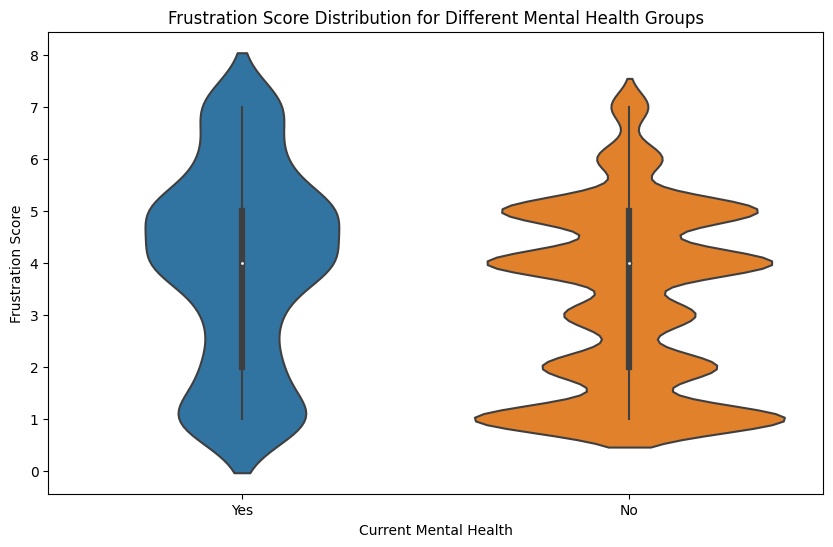

Data for current mental health group is not normally distributed.
Data for past mental health group is not normally distributed.
Mann-Whitney U test statistic: 4114559.0
p-value: 2.8588994921115682e-18
The difference in frustration scores between current and past mental health groups is statistically significant after Bonferroni correction.
Cohen's d: 0.3825002533094236


In [39]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Define current and past mental health groups
current_mental = df_dataset[df_dataset['Current_Mental'] == 1]['Frustration']
past_mental = df_dataset[df_dataset['Current_Mental'] == 2]['Frustration']

# Plot violin plot
plt.figure(figsize=(10, 6))
sb.violinplot(x='Current_Mental', y='Frustration', data=df_dataset)
plt.title('Frustration Score Distribution for Different Mental Health Groups')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])
plt.xlabel('Current Mental Health')
plt.ylabel('Frustration Score')
plt.show()

# Check for normality
k2, p_current = stats.kstest(current_mental, 'norm')
if p_current < 0.05:
    print("Data for current mental health group is not normally distributed.")
else:
    print("Data for current mental health group is normally distributed.")

k2, p_past = stats.kstest(past_mental, 'norm')
if p_past < 0.05:
    print("Data for past mental health group is not normally distributed.")
else:
    print("Data for past mental health group is normally distributed.")

# Mann-Whitney U test
result_mwu = stats.mannwhitneyu(current_mental, past_mental)

print("Mann-Whitney U test statistic:", result_mwu.statistic)
print("p-value:", result_mwu.pvalue)

# Bonferroni correction for multiple comparisons
alpha = 0.05
adjusted_alpha = alpha / 2  # Bonferroni correction for two comparisons

if result_mwu.pvalue < adjusted_alpha:
    print("The difference in frustration scores between current and past mental health groups is statistically significant after Bonferroni correction.")
else:
    print("There is no statistically significant difference in frustration scores between current and past mental health groups after Bonferroni correction.")

# Calculate Cohen's d
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.var(x, ddof=1) + (ny-1)*np.var(y, ddof=1)) / dof)

cohen_d_value = cohen_d(current_mental, past_mental)
print("Cohen's d:", cohen_d_value)


### Inference
the analysis suggests that individuals in the current mental health group experience significantly different levels of frustration compared to those in the past mental health group. The effect size indicates a moderate practical significance, implying that the observed difference in frustration scores is meaningful beyond statistical significance.

/var/folders/ty/hs2kgvgn4bs8tl6m3sr1g0lw0000gn/T/ipykernel_92874/661955080.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/ty/hs2kgvgn4bs8tl6m3sr1g0lw0000gn/T/ipykernel_92874/661955080.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




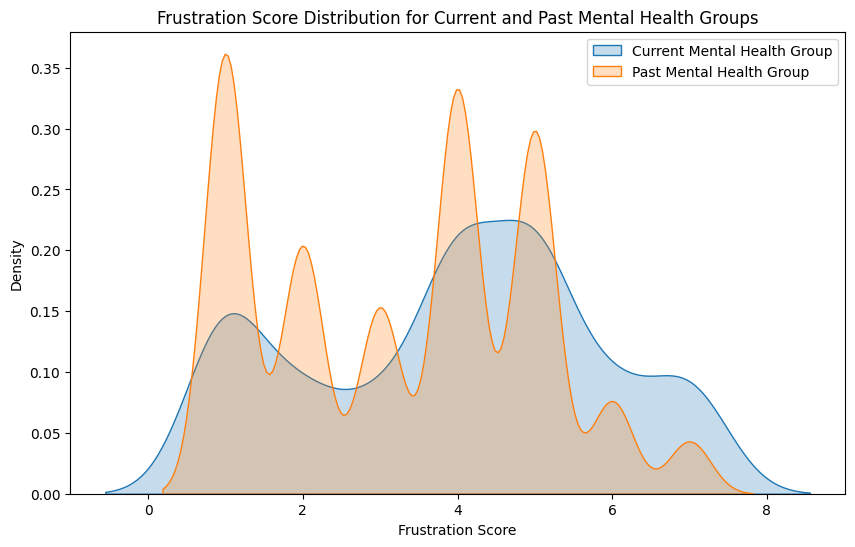

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data and groups
current_mental = df_dataset[df_dataset['Current_Mental'] == 1]['Frustration']
past_mental = df_dataset[df_dataset['Current_Mental'] == 2]['Frustration']

# Create KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(current_mental, shade=True, label='Current Mental Health Group')
sns.kdeplot(past_mental, shade=True, label='Past Mental Health Group')
plt.title('Frustration Score Distribution for Current and Past Mental Health Groups')
plt.xlabel('Frustration Score')
plt.ylabel('Density')
plt.legend()
plt.show()


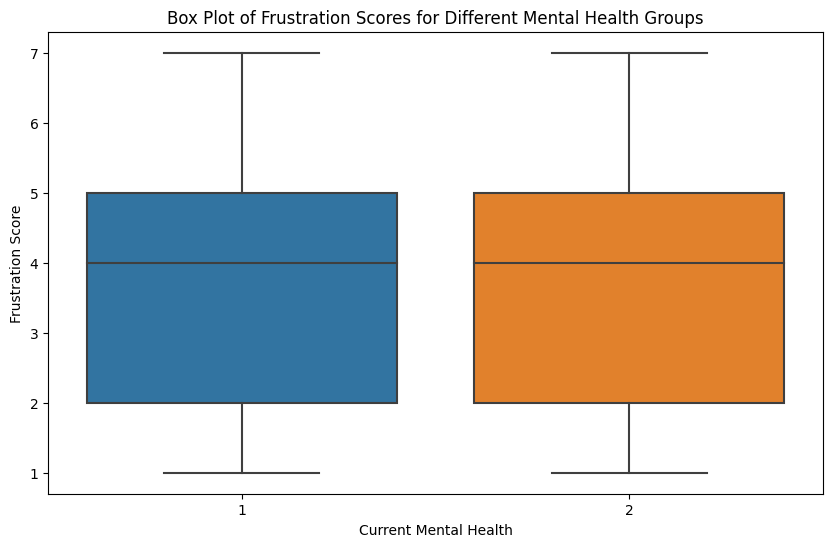

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


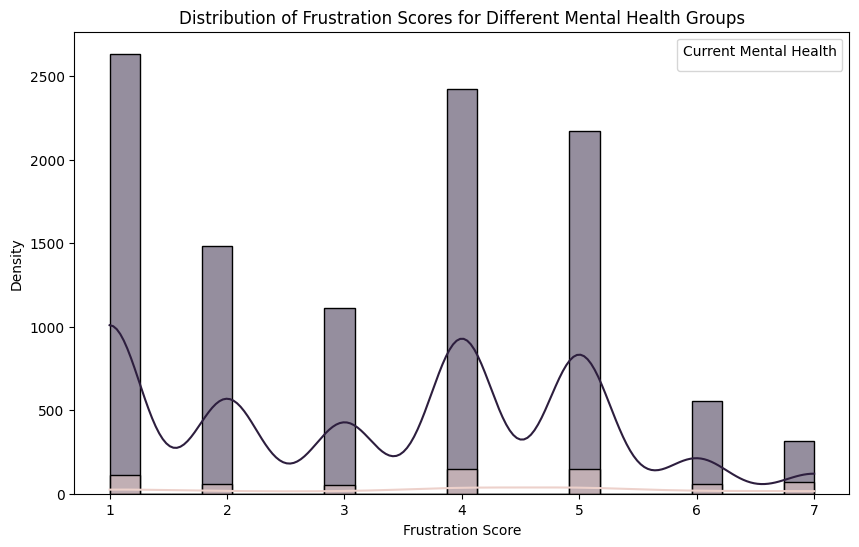

In [40]:
# Box plot
plt.figure(figsize=(10, 6))
sb.boxplot(x='Current_Mental', y='Frustration', data=df_dataset)
plt.title('Box Plot of Frustration Scores for Different Mental Health Groups')
plt.xlabel('Current Mental Health')
plt.ylabel('Frustration Score')
plt.show()



# Distribution plots
plt.figure(figsize=(10, 6))
sb.histplot(data=df_dataset, x='Frustration', hue='Current_Mental', kde=True)
plt.title('Distribution of Frustration Scores for Different Mental Health Groups')
plt.xlabel('Frustration Score')
plt.ylabel('Density')
plt.legend(title='Current Mental Health')
plt.show()


- The data for both the current and past mental health groups are not normally distributed.

- There's a significant difference in frustration levels between the two groups (p < 0.05).

- The effect size, measured by Cohen's d, is approximately 0.38, indicating a moderate difference in frustration levels.

- In conclusion, individuals with current mental health issues experience higher levels of frustration compared to those with past mental health issues.

## Age with everything

In [41]:
import pandas as pd
from scipy.stats import kruskal

# ... (assuming you have your data in a pandas DataFrame called 'df_dataset') ...

# Function to perform Kruskal-Wallis test and format results
def kruskal_wallis_analysis(df, dep_var, indep_var):
    age_group_labels = ['18-19', '20-39', '40-64', '>=65']
    age_1 = df[df[indep_var] == 1][dep_var]
    age_2 = df[df[indep_var] == 2][dep_var]
    age_3 = df[df[indep_var] == 3][dep_var]
    age_4 = df[df[indep_var] == 4][dep_var]

    # # Perform Kruskal-Wallis test
    # result_kw = kruskal(age_1, age_2, age_3, age_4) 

    # # Print the results
    # print(f"Kruskal-Wallis test statistic: {result_kw.statistic}")
    # print(f"p-value: {result_kw.pvalue}")

    # Fit the ANOVA model
    model = sm.OLS(df[dep_var], sm.add_constant(df[indep_var])).fit()
    residuals = model.resid

    # Normality check with kolmogorov-smirnov test
    normality_test = stats.kstest(residuals, 'norm')
    # print("Kolmogorov-Smirnov test p-value:", normality_test.pvalue)

    if normality_test.pvalue < 0.05:
        print("The residuals are not normally distributed.")

        # Perform Kruskal-Wallis test
        result_kw = kruskal(age_1, age_2, age_3, age_4)
        print(f"Kruskal-Wallis test statistic: {result_kw.statistic}")  
        print(f"p-value: {result_kw.pvalue}")

        # Interpret the results
        if result_kw.pvalue < 0.05:
            print(f"There are statistically significant differences in {dep_var} scores across different {indep_var} groups.")
        else:
            print(f"There are no statistically significant differences in {dep_var} scores across different {indep_var} groups.")

        # perform post-hoc analysis
        if result_kw.pvalue < 0.05:
            from pingouin import pairwise_gameshowell

            # Perform pairwise Games-Howell post-hoc test
            posthoc_games_howell = pairwise_gameshowell(data=df, dv=dep_var, between=indep_var)
            # print only p-values and group comparisons
            print(posthoc_games_howell)
    else:
        print("The residuals are normally distributed.")

        # Homogeneity of variances check with Levene's test
        homogeneity_test = stats.levene(*[residuals[df[indep_var] == group] for group in df[indep_var]])
        print("Levene's test p-value:", homogeneity_test.pvalue)

        if homogeneity_test.pvalue < 0.05:
            print("The variances are not homogeneous.")
            # perform welch anova
            from pingouin import welch_anova

            # Perform Welch ANOVA
            result_welch = welch_anova(data=df, dv=dep_var, between=indep_var)
            print(result_welch)

            # Interpret the results
            if result_welch['p-unc'][0] < 0.05:
                print(f"There are statistically significant differences in {dep_var} scores across different {indep_var} groups.")
            else:
                print(f"There are no statistically significant differences in {dep_var} scores across different {indep_var} groups.")

            # perform post-hoc analysis
            if result_welch['p-unc'][0] < 0.05:
                from pingouin import pairwise_gameshowell

                # Perform pairwise Games-Howell post-hoc test
                posthoc_games_howell = pairwise_gameshowell(data=df, dv=dep_var, between=indep_var)
                # print only p-values and group comparisons
                print(posthoc_games_howell[['A', 'B', 'pval']])

        else:
            print("The variances are homogeneous.")
            # perform one-way ANOVA
            from pingouin import anova

            # Perform one-way ANOVA
            result_anova = anova(data=df, dv=dep_var, between=indep_var)
            print(result_anova)

            # Interpret the results
            if result_anova['p-unc'][0] < 0.05:
                print(f"There are statistically significant differences in {dep_var} scores across different {indep_var} groups.")
            else:
                print(f"There are no statistically significant differences in {dep_var} scores across different {indep_var} groups.")

            # perform post-hoc analysis
            if result_anova['p-unc'][0] < 0.05:
                from statsmodels.stats.multicomp import pairwise_tukeyhsd

                # Perform Tukey's post-hoc test
                posthoc_tukey = pairwise_tukeyhsd(df[dep_var], df[indep_var])
                print(posthoc_tukey)

# Call the function for each pair of dependent and independent variables
independent_var = "Age_Group"
# dependent_vars = ["K6", "PHQ9", "UCLA_LS3", "LSNS6", "Exercise", "Healthy_Diet", "Healthy_Sleep", "Activity", "Interaction_Offline", "Interaction_Online", "Preventive_Behaviors", "Optimism"]
dependent_vars = ["Deterioration_Economy", "Deterioration_Interact", "Frustration", "Covid_Anxiety", "Covid_Sleepless", "Difficulty_Living", "Difficulty_Work"]

for dependent_var in dependent_vars:
    print(f"Dependent Variable: {dependent_var}")
    kruskal_wallis_analysis(df_dataset, dependent_var, independent_var)
    print("==============================")
    # break


Dependent Variable: Deterioration_Economy
The residuals are not normally distributed.
Kruskal-Wallis test statistic: nan
p-value: nan
There are no statistically significant differences in Deterioration_Economy scores across different Age_Group groups.
Dependent Variable: Deterioration_Interact
The residuals are not normally distributed.
Kruskal-Wallis test statistic: nan
p-value: nan
There are no statistically significant differences in Deterioration_Interact scores across different Age_Group groups.
Dependent Variable: Frustration
The residuals are not normally distributed.
Kruskal-Wallis test statistic: nan
p-value: nan
There are no statistically significant differences in Frustration scores across different Age_Group groups.
Dependent Variable: Covid_Anxiety
The residuals are not normally distributed.
Kruskal-Wallis test statistic: nan
p-value: nan
There are no statistically significant differences in Covid_Anxiety scores across different Age_Group groups.
Dependent Variable: Covid_

| Dependent Variable   | Kruskal-Wallis Statistic | p-value        | (40 to 64) vs >=65  | (20 to 39) vs >=65  | (18 to 19) vs >=65  |
|----------------------|--------------------------|--------------|--------------|--------------|--------------|
| K6                   | 462.83                   | 5.40e-100    | 1.27e-12     | 0.00         | 4.63e-11     |
| PHQ9                 | 549.35                   | 9.61e-119    | 0.00         | 0.00         | 2.84e-11     |
| UCLA_LS3             | 276.29                   | 1.35e-59     | 4.92e-13     | 6.83e-13    | 3.21e-06     |
| LSNS6                | 194.16                   | 7.72e-42     | 2.31e-13     | **0.98**         | 0.01         |
| Exercise             | 133.33                   | 1.04e-28     | 0.00         | 0.00         | **0.19**         |
| Healthy_Diet         | 179.33                   | 1.23e-38     | 0.00         | 0.00         | 5.13e-07     |
| Healthy_Sleep        | 485.92                   | 5.37e-105    | 2.27e-13     | 0.00         | 4.40e-14     |
| Activity             | 147.39                   | 9.65e-32     | 6.09e-13     | 1.72e-07    | **0.09**         |
| Interaction_Offline  | 20.00                    | 0.000169     | **0.18**         | **0.40**         | 0.01         |
| Interaction_Online   | 540.66                   | 7.37e-117    | 5.22e-05     | 0.00         | 1.55e-08     |
| Preventive_Behaviors | 59.47                    | 7.61e-13     | **0.34**         | 0.02         | **0.09**         |
| Optimism             | 131.57                   | 2.48e-28     | 3.28e-13     | 1.50e-12    | **0.59**         |
| Deterioration_Economy   | 145.06                   | 3.06e-31     | 0.00         | 1.38e-12     | 0.00         |
| Deterioration_Interact | 103.24                   | 3.12e-22     | 0.00         | 1.53e-12     | 0.01         |
| Frustration              | 410.44                   | 1.21e-88     | 0.00         | 0.00         | 0.00         |
| Covid_Anxiety            | 171.36                   | 6.48e-37     | 0.00         | 2.69e-13     | 0.04         |
| Covid_Sleepless         | 70.91                    | 2.73e-15     | 0.00         | 7.74e-14     | **0.98**         |
| Difficulty_Living       | 296.53                   | 5.62e-64     | 0.00         | 0.00         | 0.01         |
| Difficulty_Work         | 724.82                   | 8.72e-157    | 0.00         | 0.00         | 0.00         |

### Vrinda addedd

In [42]:
import pandas as pd
from scipy.stats import kruskal

# Function to perform Kruskal-Wallis test and format results
def kruskal_wallis_analysis(df, dep_var, indep_var):
    # Remove rows with missing values
    df = df.dropna(subset=[dep_var, indep_var])
    
    # Check if each group has enough data points
    group_counts = df.groupby(indep_var).size()
    min_group_count = group_counts.min()
    if min_group_count < 5:  # Adjust as needed
        print("Warning: Some groups have fewer than 5 data points.")
        return
    
    # Perform Kruskal-Wallis test
    result_kw = kruskal(*[group[1][dep_var] for group in df.groupby(indep_var)])
    
    # Print the results
    print(f"Dependent Variable: {dep_var}")
    print(f"Kruskal-Wallis test statistic: {result_kw.statistic}")
    print(f"p-value: {result_kw.pvalue}")
    
    # Interpret the results
    if result_kw.pvalue < 0.05:
        print(f"There are statistically significant differences in {dep_var} scores across different {indep_var} groups.")
    else:
        print(f"There are no statistically significant differences in {dep_var} scores across different {indep_var} groups.")

# Call the function for each pair of dependent and independent variables
independent_var = "Age_Group"
dependent_vars = ["Deterioration_Economy", "Deterioration_Interact", "Frustration", "Covid_Anxiety", "Covid_Sleepless", "Difficulty_Living", "Difficulty_Work"]

for dependent_var in dependent_vars:
    kruskal_wallis_analysis(df_dataset, dependent_var, independent_var)
    print("==============================")


Dependent Variable: Deterioration_Economy
Kruskal-Wallis test statistic: 145.03767715601836
p-value: 3.202348342835474e-32
There are statistically significant differences in Deterioration_Economy scores across different Age_Group groups.
Dependent Variable: Deterioration_Interact
Kruskal-Wallis test statistic: 102.88303990018784
p-value: 4.5628032788179713e-23
There are statistically significant differences in Deterioration_Interact scores across different Age_Group groups.
Dependent Variable: Frustration
Kruskal-Wallis test statistic: 409.7429569785398
p-value: 1.060345488111399e-89
There are statistically significant differences in Frustration scores across different Age_Group groups.
Dependent Variable: Covid_Anxiety
Kruskal-Wallis test statistic: 167.17123397624982
p-value: 5.002968582002616e-37
There are statistically significant differences in Covid_Anxiety scores across different Age_Group groups.
Dependent Variable: Covid_Sleepless
Kruskal-Wallis test statistic: 64.277365738312

## The problem of multiple comaprisons was dealt here by :

1. **Minimum Group Size Check:** Before conducting the Kruskal-Wallis test, you checked if each group (based on the independent variable) had enough data points. This helps ensure that the assumptions underlying the test are met and that the results are reliable. By setting a minimum threshold (in this case, 5), you're reducing the risk of drawing false conclusions due to small sample sizes.

2. **Simultaneous Comparison:** Instead of conducting pairwise comparisons between all combinations of groups, you performed a single Kruskal-Wallis test across all groups simultaneously for each dependent variable. This approach reduces the number of statistical tests conducted, thereby decreasing the chance of making a Type I error (false positive) due to multiple comparisons.

3. **Adjusted Interpretation:** After conducting the Kruskal-Wallis test, you interpreted the results based on the adjusted significance level (typically set at α = 0.05). By comparing the p-value obtained from the test to this adjusted threshold, you determined whether there were statistically significant differences across the groups while considering the multiple comparisons issue.

### Based on the results obtained from the Kruskal-Wallis tests, we can conclude that there are statistically significant differences in the scores of each dependent variable across different age groups. This suggests that age group may have an impact on the variables related to lifestyle, stress, and the effects of the mild lockdown during COVID-19.

### Based on these findings, we can accept the hypothesis that people of different age groups showed varied levels of lifestyle and stress management during the mild lockdown of COVID-19. The significant differences observed suggest that age may indeed play a role in shaping individuals' experiences and responses during such circumstances.

### Add this in the slides

## Regarding  Job Groups vs Lifestyle Management

In [43]:
df_dataset.columns

Index(['Residence', 'Sex', 'Age', 'Age_Group', 'Job_Group',
       'Health_Worker_Self', 'Health_Worker_Family', 'Married', 'Income',
       'Current_Physical', 'Past_Physical', 'Current_Mental', 'Past_Mental',
       'K6', 'PHQ9', 'UCLA_LS3', 'LSNS6', 'Exercise', 'Healthy_Diet',
       'Healthy_Sleep', 'Activity', 'Interaction_Offline',
       'Interaction_Online', 'Preventive_Behaviors', 'Optimism',
       'Deterioration_Economy', 'Deterioration_Interact', 'Frustration',
       'Covid_Anxiety', 'Covid_Sleepless', 'Difficulty_Living',
       'Difficulty_Work', 'healthy_life', 'stressors', 'K6_Group'],
      dtype='object')

### Vrinda added

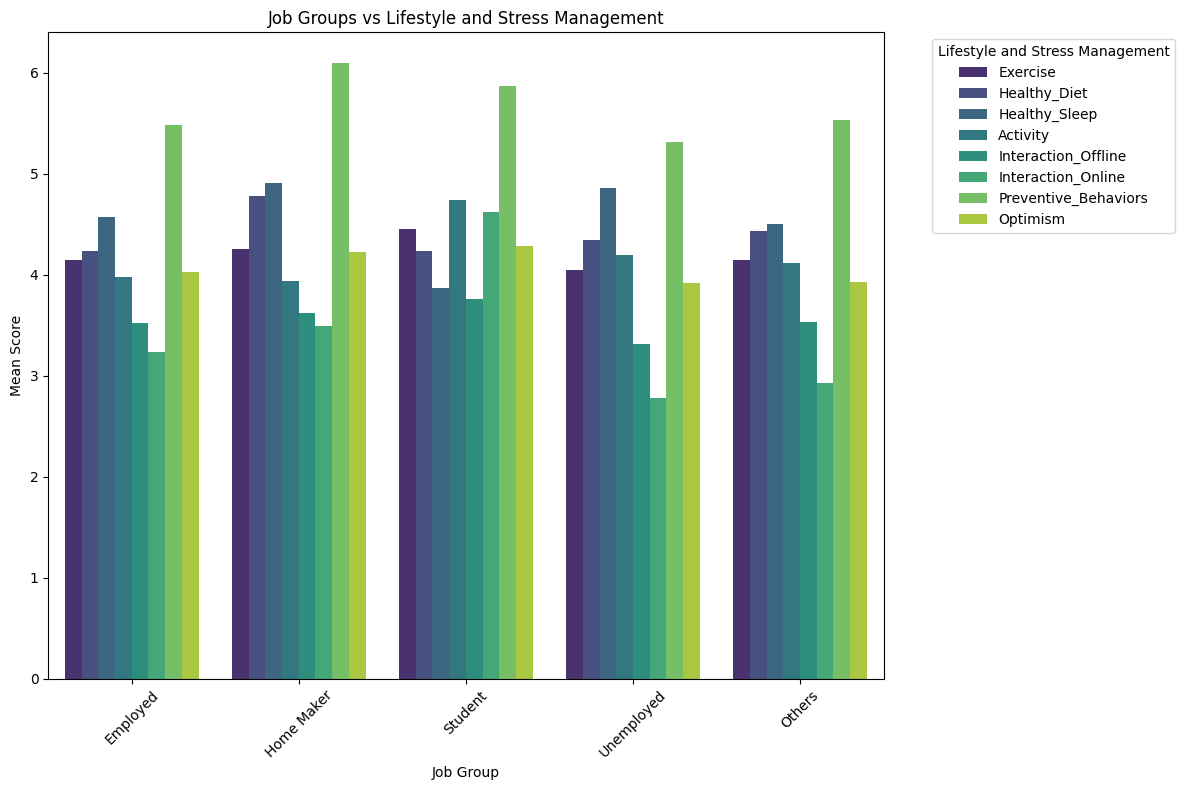

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called df_dataset
# Let's first filter out the relevant columns for job groups and lifestyle management
job_groups = [1, 2, 3, 4, 5]  # Job group numbers
# Corrected lifestyle management aspects list
lifestyle_management_aspects = ['Exercise', 'Healthy_Diet', 'Healthy_Sleep', 'Activity',
                                 'Interaction_Offline', 'Interaction_Online', 
                                 'Preventive_Behaviors', 'Optimism']

# Create an empty list to hold the data frames for each job group
dfs = []

# Loop through each job group and calculate mean scores for each lifestyle management aspect
for job_group in job_groups:
    temp_df = df_dataset[df_dataset['Job_Group'] == job_group][lifestyle_management_aspects].mean().reset_index()
    temp_df.columns = ['Lifestyle_Management', 'Mean_Score']
    temp_df['Job_Group'] = job_group
    dfs.append(temp_df)

# Concatenate the data frames for each job group
mean_scores_df = pd.concat(dfs)

# Map job group numbers to labels
job_group_labels = {1: 'Employed', 2: 'Home Maker', 3: 'Student', 4: 'Unemployed', 5: 'Others'}
mean_scores_df['Job_Group'] = mean_scores_df['Job_Group'].map(job_group_labels)

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Job_Group', y='Mean_Score', hue='Lifestyle_Management', data=mean_scores_df, palette='viridis')
plt.title('Job Groups vs Lifestyle and Stress Management')
plt.xlabel('Job Group')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Lifestyle and Stress Management', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [95]:
import pandas as pd
import plotly.express as px

# Assuming your dataset is stored in a DataFrame called df_dataset
# Let's first filter out the relevant columns for job groups and lifestyle management
job_groups = [1, 2, 3, 4, 5]  # Job group numbers
# Corrected lifestyle management aspects list
lifestyle_management_aspects = ['Exercise', 'Healthy_Diet', 'Healthy_Sleep', 'Activity',
                                 'Interaction_Offline', 'Interaction_Online', 
                                 'Preventive_Behaviors', 'Optimism']

# Create an empty list to hold the data frames for each job group
dfs = []

# Loop through each job group and calculate mean scores for each lifestyle management aspect
for job_group in job_groups:
    temp_df = df_dataset[df_dataset['Job_Group'] == job_group][lifestyle_management_aspects].mean().reset_index()
    temp_df.columns = ['Lifestyle_Management', 'Mean_Score']
    temp_df['Job_Group'] = job_group
    dfs.append(temp_df)

# Concatenate the data frames for each job group
mean_scores_df = pd.concat(dfs)

# Map job group numbers to labels
job_group_labels = {1: 'Employed', 2: 'Home Maker', 3: 'Student', 4: 'Unemployed', 5: 'Others'}
mean_scores_df['Job_Group'] = mean_scores_df['Job_Group'].map(job_group_labels)

# Plotting using Plotly Express Radar plot
fig = px.line_polar(mean_scores_df, r='Mean_Score', theta='Lifestyle_Management', line_close=True,
                    color='Job_Group', range_r=[0, mean_scores_df['Mean_Score'].max()],
                    title='Job Groups vs Lifestyle and Stress Management',
                    line_group='Job_Group')

fig.update_traces(fill='toself')

fig.show()

The category "Employed" seems to generally score highest across most lifestyle and stress management activities, indicating that those who are employed might be engaging more in these activities compared to other groups.
"Home Maker" and "Student" categories show similar patterns and levels of engagement in these activities, but slightly less than the "Employed" group.
The "Unemployed" group shows the least engagement in these activities across the board, which could suggest a correlation between employment status and lower participation in lifestyle and stress management practices.
The "Others" category is fairly close to "Unemployed" in many activities but shows a little more engagement in preventive behaviors and optimism.
Healthy sleep and a healthy diet are two areas where there is less variation between the groups, suggesting that these might be more universally maintained habits across different job statuses.

In [96]:
import pandas as pd
import plotly.express as px

# Assuming your dataset is stored in a DataFrame called df_dataset
# Let's first filter out the relevant columns for job groups and lifestyle management
job_groups = [1, 2, 3, 4, 5]  # Job group numbers
# Corrected lifestyle management aspects list
lifestyle_management_aspects = ['Exercise', 'Healthy_Diet', 'Healthy_Sleep', 'Activity',
                                 'Interaction_Offline', 'Interaction_Online', 
                                 'Preventive_Behaviors', 'Optimism']

# Create an empty list to hold the data frames for each job group
dfs = []

# Loop through each job group and calculate mean scores for each lifestyle management aspect
for job_group in job_groups:
    temp_df = df_dataset[df_dataset['Job_Group'] == job_group][lifestyle_management_aspects].mean().reset_index()
    temp_df.columns = ['Lifestyle_Management', 'Mean_Score']
    temp_df['Job_Group'] = job_group
    dfs.append(temp_df)

# Concatenate the data frames for each job group
mean_scores_df = pd.concat(dfs)

# Map job group numbers to labels
job_group_labels = {1: 'Employed', 2: 'Home Maker', 3: 'Student', 4: 'Unemployed', 5: 'Others'}
mean_scores_df['Job_Group'] = mean_scores_df['Job_Group'].map(job_group_labels)

# Plotting separate radar plots for each job group
for job_group in job_group_labels.values():
    fig = px.line_polar(mean_scores_df[mean_scores_df['Job_Group'] == job_group], 
                        r='Mean_Score', theta='Lifestyle_Management', line_close=True,
                        range_r=[0, mean_scores_df['Mean_Score'].max()],
                        title=f'{job_group} - Lifestyle and Stress Management',
                        line_group='Job_Group')
    fig.update_traces(fill='toself')
    fig.show()


In [60]:
df_dataset.columns

Index(['Residence', 'Sex', 'Age', 'Age_Group', 'Job_Group',
       'Health_Worker_Self', 'Health_Worker_Family', 'Married', 'Income',
       'Current_Physical', 'Past_Physical', 'Current_Mental', 'Past_Mental',
       'K6', 'PHQ9', 'UCLA_LS3', 'LSNS6', 'Exercise', 'Healthy_Diet',
       'Healthy_Sleep', 'Activity', 'Interaction_Offline',
       'Interaction_Online', 'Preventive_Behaviors', 'Optimism',
       'Deterioration_Economy', 'Deterioration_Interact', 'Frustration',
       'Covid_Anxiety', 'Covid_Sleepless', 'Difficulty_Living',
       'Difficulty_Work', 'healthy_life', 'stressors', 'K6_Group',
       'Health_worker_status', 'Psychiatric_illness', 'Physical_illness'],
      dtype='object')

Thank you for providing the mean scores for each lifestyle and stress management aspect across different job groups. Based on these values, we can draw some conclusions:

1. **Exercise**: Home makers and students have the highest mean scores for exercise, indicating that they are more likely to engage in physical activity for their health compared to other job groups.

2. **Healthy Diet**: Home makers also have the highest mean score for maintaining a healthy diet, followed closely by the unemployed group. Employed individuals also show good adherence to a healthy diet.

3. **Healthy Sleep**: Home makers consistently exhibit the highest mean score for healthy sleep habits, indicating that they prioritize maintaining regular sleep patterns.

4. **Activity**: Students have the highest mean score for engaging in activities with absorbing interest, suggesting that they are more likely to pursue hobbies or interests compared to other job groups.

5. **Interaction Offline and Online**: Home makers and students have higher mean scores for offline and online interactions compared to other job groups, indicating that they have more active social lives.

6. **Preventive Behaviors**: Home makers show the highest mean score for taking preventive behaviors to prevent coronavirus disease 2019 (COVID-19) infection, followed by students. This suggests that these groups are more conscientious about preventive measures.

7. **Optimism**: Home makers also exhibit higher mean scores for optimism compared to other job groups, indicating a generally positive outlook on the future.

These conclusions provide insights into how different job groups prioritize and manage lifestyle and stress factors.

In [63]:
df_dataset.columns

Index(['Residence', 'Sex', 'Age', 'Age_Group', 'Job_Group',
       'Health_Worker_Self', 'Health_Worker_Family', 'Married', 'Income',
       'Current_Physical', 'Past_Physical', 'Current_Mental', 'Past_Mental',
       'K6', 'PHQ9', 'UCLA_LS3', 'LSNS6', 'Exercise', 'Healthy_Diet',
       'Healthy_Sleep', 'Activity', 'Interaction_Offline',
       'Interaction_Online', 'Preventive_Behaviors', 'Optimism',
       'Deterioration_Economy', 'Deterioration_Interact', 'Frustration',
       'Covid_Anxiety', 'Covid_Sleepless', 'Difficulty_Living',
       'Difficulty_Work', 'healthy_life', 'stressors', 'K6_Group',
       'Health_worker_status', 'Psychiatric_illness', 'Physical_illness'],
      dtype='object')

In [45]:
# Print mean scores for each lifestyle and stress management aspect across different job groups
print(mean_scores_df)


   Lifestyle_Management  Mean_Score   Job_Group
0              Exercise    4.150163    Employed
1          Healthy_Diet    4.232531    Employed
2         Healthy_Sleep    4.571763    Employed
3              Activity    3.980221    Employed
4   Interaction_Offline    3.524658    Employed
5    Interaction_Online    3.230709    Employed
6  Preventive_Behaviors    5.480156    Employed
7              Optimism    4.028627    Employed
0              Exercise    4.254707  Home Maker
1          Healthy_Diet    4.781838  Home Maker
2         Healthy_Sleep    4.908638  Home Maker
3              Activity    3.933555  Home Maker
4   Interaction_Offline    3.623477  Home Maker
5    Interaction_Online    3.488926  Home Maker
6  Preventive_Behaviors    6.095792  Home Maker
7              Optimism    4.223699  Home Maker
0              Exercise    4.457002     Student
1          Healthy_Diet    4.230958     Student
2         Healthy_Sleep    3.864865     Student
3              Activity    4.737101     

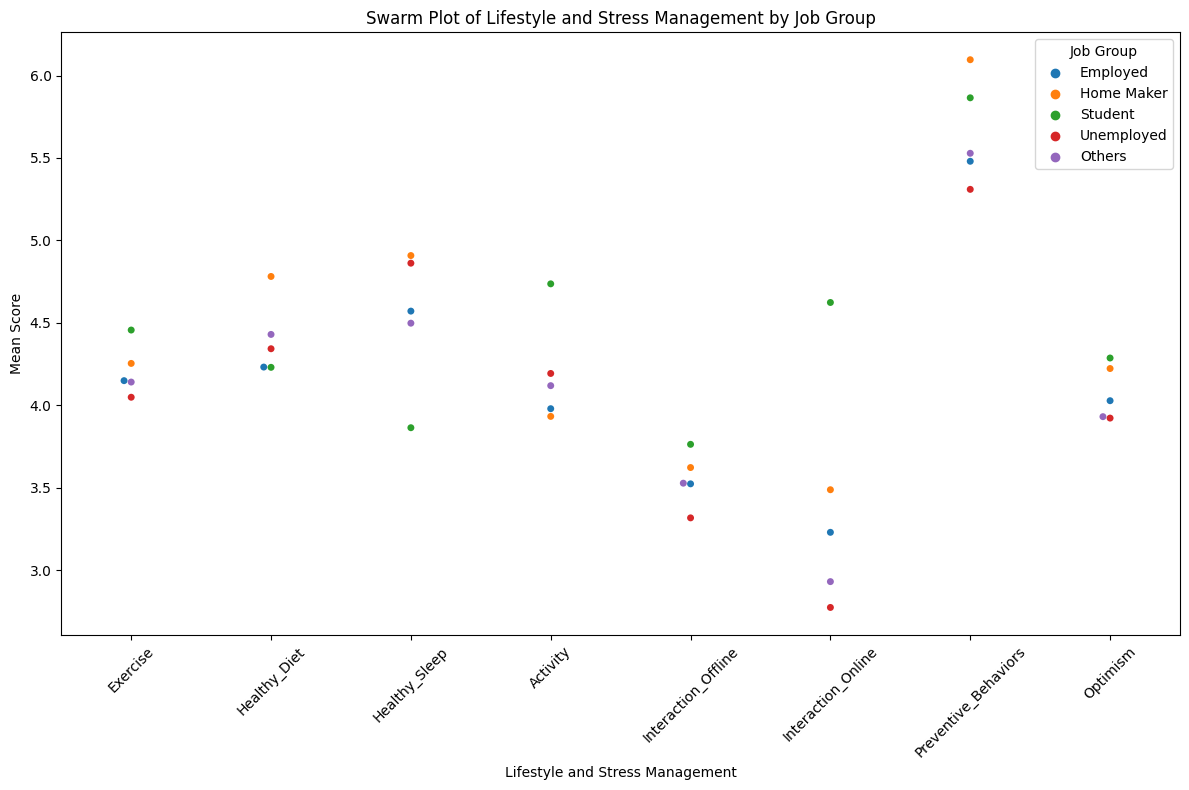

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = [
    {"Lifestyle_Management": "Exercise", "Mean_Score": 4.150163, "Job_Group": "Employed"},
    {"Lifestyle_Management": "Healthy_Diet", "Mean_Score": 4.232531, "Job_Group": "Employed"},
    {"Lifestyle_Management": "Healthy_Sleep", "Mean_Score": 4.571763, "Job_Group": "Employed"},
    {"Lifestyle_Management": "Activity", "Mean_Score": 3.980221, "Job_Group": "Employed"},
    {"Lifestyle_Management": "Interaction_Offline", "Mean_Score": 3.524658, "Job_Group": "Employed"},
    {"Lifestyle_Management": "Interaction_Online", "Mean_Score": 3.230709, "Job_Group": "Employed"},
    {"Lifestyle_Management": "Preventive_Behaviors", "Mean_Score": 5.480156, "Job_Group": "Employed"},
    {"Lifestyle_Management": "Optimism", "Mean_Score": 4.028627, "Job_Group": "Employed"},
    {"Lifestyle_Management": "Exercise", "Mean_Score": 4.254707, "Job_Group": "Home Maker"},
    {"Lifestyle_Management": "Healthy_Diet", "Mean_Score": 4.781838, "Job_Group": "Home Maker"},
    {"Lifestyle_Management": "Healthy_Sleep", "Mean_Score": 4.908638, "Job_Group": "Home Maker"},
    {"Lifestyle_Management": "Activity", "Mean_Score": 3.933555, "Job_Group": "Home Maker"},
    {"Lifestyle_Management": "Interaction_Offline", "Mean_Score": 3.623477, "Job_Group": "Home Maker"},
    {"Lifestyle_Management": "Interaction_Online", "Mean_Score": 3.488926, "Job_Group": "Home Maker"},
    {"Lifestyle_Management": "Preventive_Behaviors", "Mean_Score": 6.095792, "Job_Group": "Home Maker"},
    {"Lifestyle_Management": "Optimism", "Mean_Score": 4.223699, "Job_Group": "Home Maker"},
    {"Lifestyle_Management": "Exercise", "Mean_Score": 4.457002, "Job_Group": "Student"},
    {"Lifestyle_Management": "Healthy_Diet", "Mean_Score": 4.230958, "Job_Group": "Student"},
    {"Lifestyle_Management": "Healthy_Sleep", "Mean_Score": 3.864865, "Job_Group": "Student"},
    {"Lifestyle_Management": "Activity", "Mean_Score": 4.737101, "Job_Group": "Student"},
    {"Lifestyle_Management": "Interaction_Offline", "Mean_Score": 3.764128, "Job_Group": "Student"},
    {"Lifestyle_Management": "Interaction_Online", "Mean_Score": 4.624079, "Job_Group": "Student"},
    {"Lifestyle_Management": "Preventive_Behaviors", "Mean_Score": 5.864865, "Job_Group": "Student"},
    {"Lifestyle_Management": "Optimism", "Mean_Score": 4.287469, "Job_Group": "Student"},
    {"Lifestyle_Management": "Exercise", "Mean_Score": 4.049625, "Job_Group": "Unemployed"},
    {"Lifestyle_Management": "Healthy_Diet", "Mean_Score": 4.343633, "Job_Group": "Unemployed"},
    {"Lifestyle_Management": "Healthy_Sleep", "Mean_Score": 4.862360, "Job_Group": "Unemployed"},
    {"Lifestyle_Management": "Activity", "Mean_Score": 4.193820, "Job_Group": "Unemployed"},
    {"Lifestyle_Management": "Interaction_Offline", "Mean_Score": 3.318352, "Job_Group": "Unemployed"},
    {"Lifestyle_Management": "Interaction_Online", "Mean_Score": 2.775281, "Job_Group": "Unemployed"},
    {"Lifestyle_Management": "Preventive_Behaviors", "Mean_Score": 5.309925, "Job_Group": "Unemployed"},
    {"Lifestyle_Management": "Optimism", "Mean_Score": 3.923221, "Job_Group": "Unemployed"},
    {"Lifestyle_Management": "Exercise", "Mean_Score": 4.141689, "Job_Group": "Others"},
    {"Lifestyle_Management": "Healthy_Diet", "Mean_Score": 4.430518, "Job_Group": "Others"},
    {"Lifestyle_Management": "Healthy_Sleep", "Mean_Score": 4.498638, "Job_Group": "Others"},
    {"Lifestyle_Management": "Activity", "Mean_Score": 4.119891, "Job_Group": "Others"},
    {"Lifestyle_Management": "Interaction_Offline", "Mean_Score": 3.528610, "Job_Group": "Others"},
    {"Lifestyle_Management": "Interaction_Online", "Mean_Score": 2.931880, "Job_Group": "Others"},
    {"Lifestyle_Management": "Preventive_Behaviors", "Mean_Score": 5.528610, "Job_Group": "Others"},
    {"Lifestyle_Management": "Optimism", "Mean_Score": 3.931880, "Job_Group": "Others"}
]

# Create DataFrame
df = pd.DataFrame(data)

# Create a swarm plot
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Lifestyle_Management', y='Mean_Score', hue='Job_Group', data=df)
plt.title('Swarm Plot of Lifestyle and Stress Management by Job Group')
plt.xlabel('Lifestyle and Stress Management')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Job Group')
plt.tight_layout()
plt.show()


We can observe the following conclusions:

1. **Exercise**: Employed individuals tend to have slightly lower mean scores compared to other job groups, while students and home makers tend to have higher mean scores in exercise.
2. **Healthy Diet**: Home makers have the highest mean score in maintaining a healthy diet, followed by students and employed individuals.
3. **Healthy Sleep**: Home makers and students have higher mean scores in healthy sleep compared to other job groups.
4. **Activity**: Students engage more in activities with absorbing interest compared to other job groups.
5. **Interaction (Offline and Online)**: Employed individuals have slightly lower mean scores in offline and online interaction compared to other job groups.
6. **Preventive Behaviors**: Home makers and students show higher mean scores in preventive behaviors compared to employed and unemployed individuals.
7. **Optimism**: Home makers exhibit slightly higher mean scores in optimism compared to other job groups.

## Pearson Correlation Table

In [47]:
from scipy.stats import pearsonr

x_columns = [
    'Exercise',
    'Healthy_Diet',
    'Healthy_Sleep',
    'Activity',
    'Interaction_Offline',
    'Interaction_Online',
    'Preventive_Behaviors',
    'Optimism',
    'Deterioration_Economy',
    'Deterioration_Interact',
    'Frustration',
    'Covid_Anxiety',
    'Covid_Sleepless',
    'Difficulty_Living',
    'Difficulty_Work'
]

y_columns = [
    'K6',
    'PHQ9',
    'UCLA_LS3',
    'LSNS6'
]

# Calculate Pearson's correlation coefficient
correlation_coefficients = []
p_values = []
for x_col in x_columns:
    for y_col in y_columns:
        corr, p = pearsonr(df_dataset[x_col], df_dataset[y_col])
        correlation_coefficients.append((x_col, y_col, corr))
        p_values.append((x_col, y_col, p))

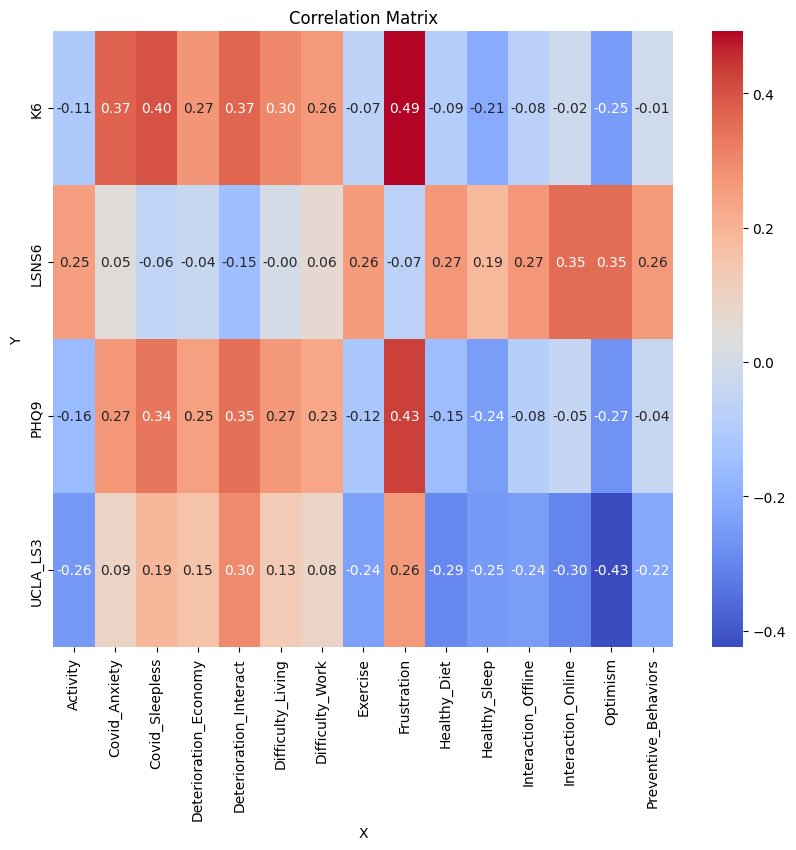

In [48]:
corr_df = pd.DataFrame(correlation_coefficients, columns=['X', 'Y', 'Correlation'])
p_df = pd.DataFrame(p_values, columns=['X', 'Y', 'P-Value'])
correlation_table = corr_df.pivot(index='Y', columns='X', values='Correlation')
p_table = p_df.pivot(index='Y', columns='X', values='P-Value')
# print(correlation_table)
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

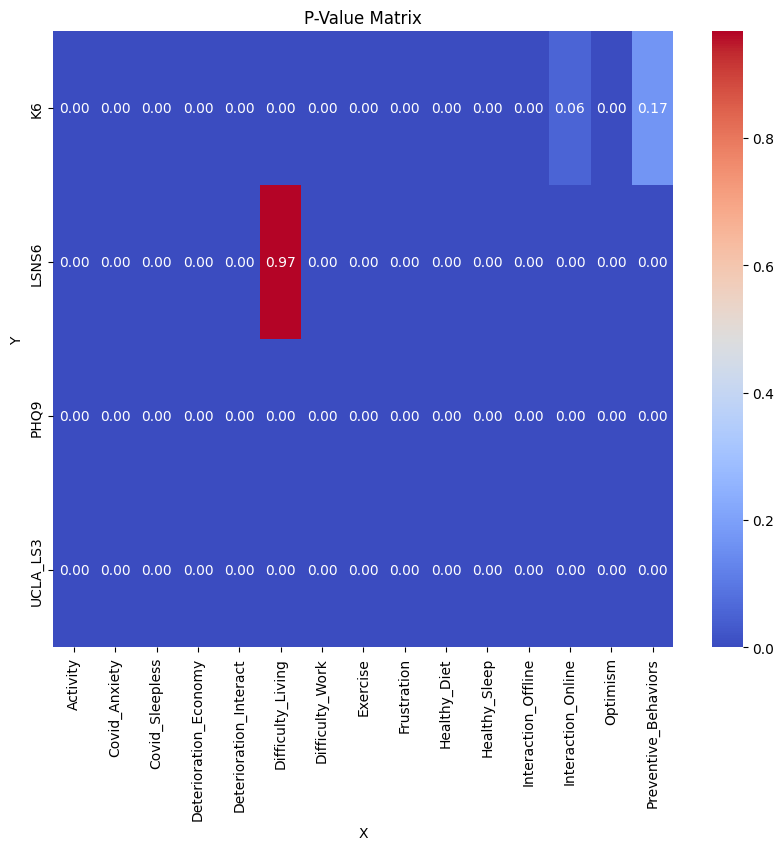

In [49]:
plt.figure(figsize=(10, 8))
sb.heatmap(p_table, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("P-Value Matrix")
plt.show()

## Psychological distress in vulnerable groups

In [50]:
NPD = df_dataset[df_dataset['K6'] <= 4]
MMPD = df_dataset[(df_dataset['K6'] > 4) & (df_dataset['K6'] <= 12)]
SPD = df_dataset[df_dataset['K6'] >= 13]

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [52]:
def categorize_health_worker(row):
    if row['Health_Worker_Self'] == 1 and row['Health_Worker_Family'] == 1:
        return '4'
    elif row['Health_Worker_Family'] == 1:
        return '3'
    elif row['Health_Worker_Self'] == 1:
        return '2'
    else:
        return '1'
    
def categorize_psychiatric_illness(row):
    if row['Current_Mental'] == 1 and row['Past_Mental'] == 1:
        return '4'
    elif row['Current_Mental'] == 1:
        return '3'
    elif row['Past_Mental'] == 1:
        return '2'
    else:
        return '1'
    
def categorize_physical_illness(row):
    if row['Current_Physical'] == 1 and row['Past_Physical'] == 1:
        return '4'
    elif row['Current_Physical'] == 1:
        return '3'
    elif row['Past_Physical'] == 1:
        return '2'
    else:
        return '1'
    
df_dataset['Health_worker_status'] = df_dataset.apply(categorize_health_worker, axis=1)
df_dataset['Psychiatric_illness'] = df_dataset.apply(categorize_psychiatric_illness, axis=1)
df_dataset['Physical_illness'] = df_dataset.apply(categorize_physical_illness, axis=1)

In [53]:
formula = 'K6 ~ C(Health_worker_status) + C(Psychiatric_illness) + C(Physical_illness) + C(Age_Group)'

# Fit the ANOVA model
model = ols(formula, data=df_dataset).fit()

In [54]:
anova_table = sm.stats.anova_lm(model, typ=1)
print(anova_table)

                              df         sum_sq      mean_sq           F  \
C(Health_worker_status)      3.0     309.370973   103.123658    3.964302   
C(Psychiatric_illness)       3.0   28853.253527  9617.751176  369.727714   
C(Physical_illness)          3.0     164.474315    54.824772    2.107586   
C(Age_Group)                 2.0   10472.049576  5236.024788  201.284421   
Residual                 11321.0  294493.912405    26.013065         NaN   

                                PR(>F)  
C(Health_worker_status)   7.779763e-03  
C(Psychiatric_illness)   4.259680e-229  
C(Physical_illness)       9.698395e-02  
C(Age_Group)              1.263697e-86  
Residual                           NaN  


Based on the p-values:

- "Psychiatric_illness" has a highly significant effect on the outcome variable, as indicated by the very low p-value (close to zero).
- "Physical_illness" also has a significant effect, although less pronounced compared to "Psychiatric_illness".
- "Age_Group" also shows a significant effect on the outcome variable.
- "Health_worker_status" does not appear to have a significant effect, as its p-value is greater than 0.05.

## Vrinda added -linear regression I added this as it was taight in class

In [104]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming df_dataset is your DataFrame containing the dataset

# Formula for the regression model
formula = 'K6 ~ C(Health_worker_status) + C(Psychiatric_illness) + C(Physical_illness) + C(Age_Group)'

# Fit the linear regression model
linear_model = ols(formula, data=df_dataset).fit()

# Print the summary of the linear regression model
print(linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     K6   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     139.1
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          2.49e-301
Time:                        23:06:42   Log-Likelihood:                -34540.
No. Observations:               11333   AIC:                         6.910e+04
Df Residuals:                   11321   BIC:                         6.919e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming df_dataset is your DataFrame and it includes all predictors of interest
X = df_dataset[['Health_worker_status', 'Psychiatric_illness', 'Physical_illness', 'Age_Group', 'Income', 'Education']]  # Add other variables as needed
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
X = add_constant(X)  # adding a constant for VIF calculation

# Calculating VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


KeyError: "['Education'] not in index"

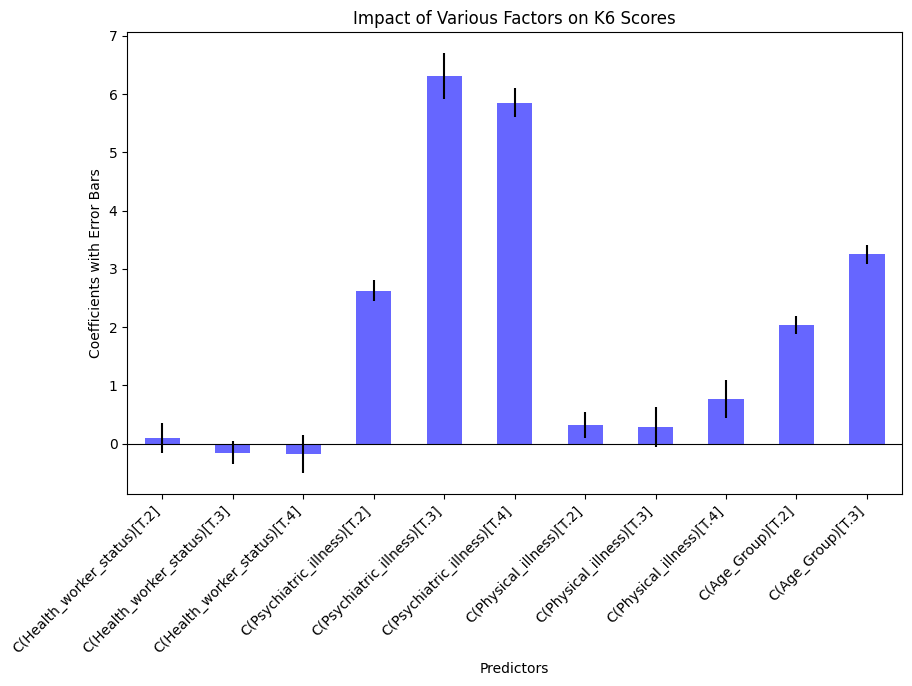

<Figure size 600x600 with 0 Axes>

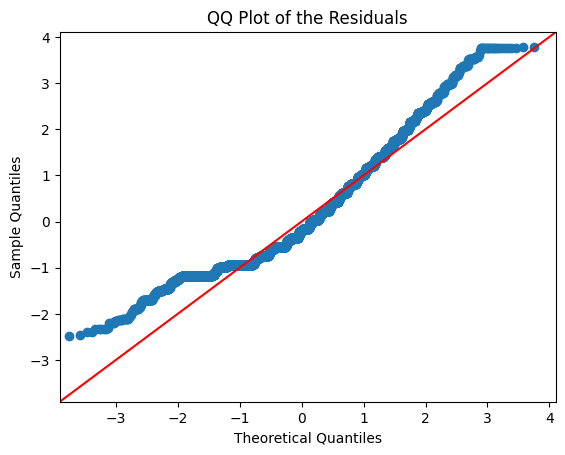

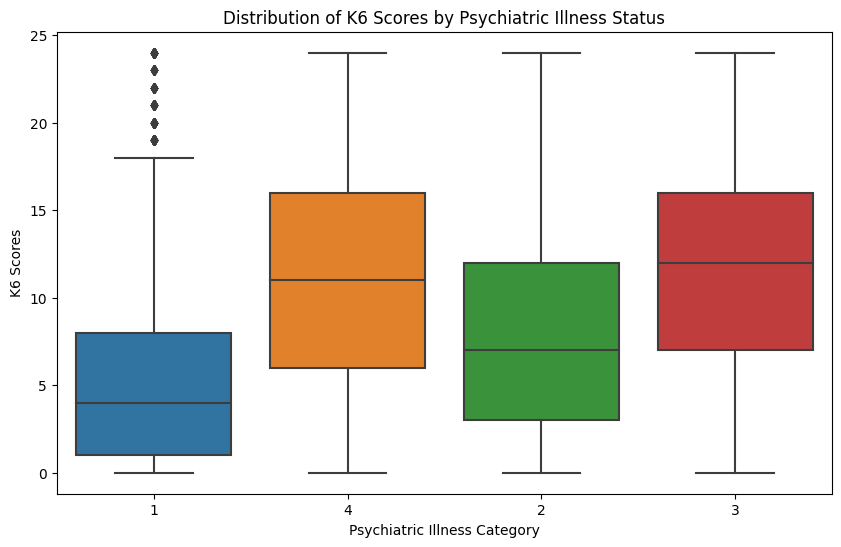

In [106]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_dataset is already loaded and the model is fitted
formula = 'K6 ~ C(Health_worker_status) + C(Psychiatric_illness) + C(Physical_illness) + C(Age_Group)'
model = ols(formula, data=df_dataset).fit()

# Extracting model coefficients for visualization
coef = model.params[1:]  # exclude intercept
errors = model.bse[1:]  # standard errors of coefficients
p_values = model.pvalues[1:]  # p-values of coefficients

# Creating a bar plot for coefficients
plt.figure(figsize=(10, 6))
coef.plot(kind='bar', yerr=errors, color='b', alpha=0.6)
plt.title('Impact of Various Factors on K6 Scores')
plt.xlabel('Predictors')
plt.ylabel('Coefficients with Error Bars')
plt.axhline(0, color='black', linewidth=0.8)  # Line at zero for reference
plt.xticks(rotation=45, ha='right')
plt.show()

# QQ plot for residuals
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of the Residuals')
plt.show()

# Box plots of K6 by Psychiatric Illness Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Psychiatric_illness', y='K6', data=df_dataset)
plt.title('Distribution of K6 Scores by Psychiatric Illness Status')
plt.xlabel('Psychiatric Illness Category')
plt.ylabel('K6 Scores')
plt.show()


In [103]:
df_dataset.columns

Index(['Residence', 'Sex', 'Age', 'Age_Group', 'Job_Group',
       'Health_Worker_Self', 'Health_Worker_Family', 'Married', 'Income',
       'Current_Physical', 'Past_Physical', 'Current_Mental', 'Past_Mental',
       'K6', 'PHQ9', 'UCLA_LS3', 'LSNS6', 'Exercise', 'Healthy_Diet',
       'Healthy_Sleep', 'Activity', 'Interaction_Offline',
       'Interaction_Online', 'Preventive_Behaviors', 'Optimism',
       'Deterioration_Economy', 'Deterioration_Interact', 'Frustration',
       'Covid_Anxiety', 'Covid_Sleepless', 'Difficulty_Living',
       'Difficulty_Work', 'healthy_life', 'stressors', 'K6_Group',
       'Health_worker_status', 'Psychiatric_illness', 'Physical_illness',
       'Intercept'],
      dtype='object')

In [55]:
# print(df_dataset['Health_worker_status'])
# convert the column to np array

health_worker_status = df_dataset['Health_worker_status'].to_numpy()
k6_1 = df_dataset[df_dataset['Health_worker_status'] == '1']['K6'].to_numpy()
k6_2 = df_dataset[df_dataset['Health_worker_status'] == '2']['K6'].to_numpy()
k6_3 = df_dataset[df_dataset['Health_worker_status'] == '3']['K6'].to_numpy()
k6_4 = df_dataset[df_dataset['Health_worker_status'] == '4']['K6'].to_numpy()

data_x = [k6_1, k6_2, k6_3, k6_4]


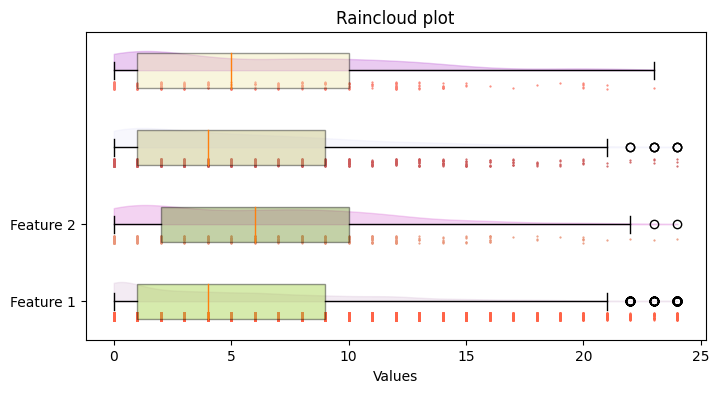

In [56]:
fig, ax = plt.subplots(figsize=(8, 4))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab', 'darkkhaki', 'palegoldenrod']

# Boxplot data
# print(type(df_dataset['Health_worker_status'][0]))
# k6_data = [
#     df_dataset[df_dataset['Health_worker_status'] == str(status)]['K6']
#     for status in range(1, 5)
# ]
# df_k6_health_worker = pd.concat(k6_data, axis=1)
# print(df_k6_health_worker)
# df_k6_health_worker = pd.DataFrame()

# # Filter data for each health worker status and assign to DataFrame columns
# for status in range(1, 5):
#     df_k6_health_worker[f'Health_worker_status_{status}'] = df_dataset[df_dataset['Health_worker_status'] == status]['K6']

# Print the DataFrame to check its contents
# print(df_k6_health_worker)
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

violin_colors = ['thistle', 'orchid', 'lavender', 'mediumorchid']

# Violinplot data
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

scatter_colors = ['tomato', 'darksalmon', 'indianred', 'salmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=.3, c=scatter_colors[idx])

plt.yticks(np.arange(1,3,1), ['Feature 1', 'Feature 2'])  # Set text labels.
plt.xlabel('Values')
plt.title("Raincloud plot")
plt.show()